## Data Collection using Kaggle API

In [1]:
!ls -lha kaggle.json

-rw-r--r--@ 1 manasak  staff    71B Jan 31 20:19 kaggle.json


The ls -lha kaggle.json command is a Linux command that lists the information about the file named "kaggle.json" in the long format, including hidden files, and in human-readable format for file sizes.

ls: is a command used to list the contents of a directory.
-l: option is used to display the contents of a directory in the long format, which includes information such as permissions, ownership, creation date, size, and file name.
-h: option is used to display file sizes in human-readable format (e.g., 1K, 234M, 2G, etc.)
-a: option is used to display hidden files, which are files that start with a dot (.).
kaggle.json: is the name of the file that the information is being displayed for.

In [2]:
!pip install -q kaggle

The pip install -q kaggle command is used to install the kaggle package using the Python package manager (pip). The -q option stands for "quiet" and suppresses any output that would normally be displayed during the installation process.

In this case, the kaggle package is a Python client for the Kaggle API that allows users to interact with Kaggle datasets and competitions, download files and submit entries directly from the command line.

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The mkdir -p ~/.kaggle command creates a directory named .kaggle in the home directory (represented by ~/) of the current user.

mkdir is a command used to create a directory.
-p is an option that tells the mkdir command to create any parent directories that do not exist. For example, if the parent directory of .kaggle (~/) does not exist, it will be created.
~/ is a shorthand for the home directory of the current user.
.kaggle is the name of the directory being created. The . in front of the directory name indicates that it is a hidden directory in Linux.

The cp kaggle.json ~/.kaggle/ command is used to copy a file named "kaggle.json" to the .kaggle directory in the home directory (represented by ~/) of the current user.

cp is a command used to copy files or directories.
kaggle.json is the name of the file being copied.
~/.kaggle/ is the destination directory for the file, where it will be copied to. The ~/ represents the home directory of the current user and .kaggle is the name of the directory.

In [4]:
!chmod 600 /Users/manasak/.kaggle/kaggle.json

The chmod 600 ~/.kaggle/kaggle.json command is used to change the permissions of the file named kaggle.json located in the .kaggle directory in the home directory (represented by ~/) of the current user.

chmod is a command used to change the permissions of files and directories.
600 is the permissions setting for the file. In this case, 600 is an octal representation of the permissions, where each digit represents the permissions for the user (the owner), the group, and others, respectively. In this case, 600 means that the owner has read and write permissions (6 in binary is 110 which is rw- in the standard Unix permissions notation), while the group and others have no permissions (0 in binary is 000 which is --- in the standard Unix permissions notation).
~/.kaggle/kaggle.json is the file for which the permissions are being changed. The ~/ represents the home directory of the current user and .kaggle is the name of the directory containing the file, kaggle.json.

In [5]:
!pwd

/Users/manasak/Downloads/MS-Data Science/Semester 2/Machine Learning/MLProject


The pwd command stands for "print working directory" and it displays the path of the current working directory. When executed, it prints the absolute path of the current directory in which the user is located.

In [6]:
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        503           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000       1007           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        596           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000       1244           False  
https://www.kaggle.com/competition

The kaggle competitions list command is used to list the available Kaggle competitions. It requires the Kaggle API to be installed and configured, as well as a valid Kaggle account. The output will be a table displaying information about each competition, such as its name, deadline, number of teams, and the prize pool.

Note that this command only works in a shell environment where the Kaggle API has been installed and the user has authorized their account by uploading the kaggle.json file.

In [7]:
!kaggle competitions download -c msk-redefining-cancer-treatment

msk-redefining-cancer-treatment.zip: Skipping, found more recently modified local copy (use --force to force download)


The kaggle competitions download -c msk-redefining-cancer-treatment command is used to download the data for the Kaggle competition named "msk-redefining-cancer-treatment". It requires the Kaggle API to be installed and configured, as well as a valid Kaggle account.

kaggle competitions download is the command for downloading data for a Kaggle competition.
-c msk-redefining-cancer-treatment is the option and argument to specify the competition name. In this case, the competition name is msk-redefining-cancer-treatment.
Note that this command only works in a shell environment where the Kaggle API has been installed and the user has authorized their account by uploading the kaggle.json file.

In [8]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

In [9]:
filename="RedefiningCancerTreatment.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="Date,Source,Author,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [10]:
endPoint = "https://newsapi.org/v2/everything?q=cancer+treatment&from=2023-04-17&to=2023-04-17&sortBy=popularity&apiKey=01de1e77a04f455f9cc9f4be51a24f0f"

In [11]:
response=requests.get(endPoint)
print(response)  

<Response [200]>


In [12]:
jsontxt = response.json()
print(jsontxt) 

{'status': 'ok', 'totalResults': 294, 'articles': [{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'Jasper Jolly', 'title': 'Sir Martin Sorrell reveals cancer treatment', 'description': 'S4 Capital boss says it’s almost ‘business as usual’ after keyhole surgery to remove tumourSir Martin Sorrell has revealed that he had keyhole surgery to remove a tumour in February, and will undergo further preventive cancer treatment.The veteran advertising…', 'url': 'https://www.theguardian.com/media/2023/apr/17/sir-martin-sorrell-reveals-cancer-treatment', 'urlToImage': 'https://i.guim.co.uk/img/media/f2e88137eace0aef26cd893ceca66b7cad454431/0_117_3500_2101/master/3500.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=b3eb23154ed599ba98078d4aa6bba558', 'publishedAt': '2023-04-17T07:59:12Z', 'content': 'Sir Martin Sorrell has revealed that he had keyhole s

In [13]:
for items in jsontxt["articles"]:
        print(items, "\n\n\n")

{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'Jasper Jolly', 'title': 'Sir Martin Sorrell reveals cancer treatment', 'description': 'S4 Capital boss says it’s almost ‘business as usual’ after keyhole surgery to remove tumourSir Martin Sorrell has revealed that he had keyhole surgery to remove a tumour in February, and will undergo further preventive cancer treatment.The veteran advertising…', 'url': 'https://www.theguardian.com/media/2023/apr/17/sir-martin-sorrell-reveals-cancer-treatment', 'urlToImage': 'https://i.guim.co.uk/img/media/f2e88137eace0aef26cd893ceca66b7cad454431/0_117_3500_2101/master/3500.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=b3eb23154ed599ba98078d4aa6bba558', 'publishedAt': '2023-04-17T07:59:12Z', 'content': 'Sir Martin Sorrell has revealed that he had keyhole surgery to remove a tumour in February, and will und

In [14]:
    MyFILE=open(filename, "a")
    #LABEL=topic
    for items in jsontxt["articles"]:
        
                  
        Author=items["author"]
        Author=str(Author)
        #Author=Author.replace(',', '')
        
        Source=items["source"]["name"]
        
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        
        
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        #print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        #print(Title)
        #print(Headline)
        
        WriteThis=str(Date)+","+str(Source)+","+str(Author)+","+ str(Title) + "," + str(Headline) + "\n"
        #print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    MyFILE.close()

In [15]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('msk-redefining-cancer-treatment.zip')

zf.extractall()

training_variants = pd.read_csv('training_variants.zip')
print('Number of data points:', training_variants.shape[0])
print('Number of features:', training_variants.shape[1])
print('Features:', training_variants.columns.values)
training_variants.head()

Number of data points: 3321
Number of features: 4
Features: ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [16]:
training_text =pd.read_csv("training_text.zip",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', training_text.shape[0])
print('Number of features : ', training_text.shape[1])
print('Features : ', training_text.columns.values)
training_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [17]:
#Merging both Data Frames
trainData = training_variants.merge(training_text,how= 'inner')

In [18]:
trainData.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  
2   Abstract Background  Non-small cell lung canc...  
3  Recent evidence has demonstrated that acquired...  
4  Oncogenic mutations in the monomeric Casitas B...

In [19]:
# Re-ordering columns
trainData = trainData.reindex(columns=['ID','Gene','Variation','TEXT','Class'])

In [20]:
trainData.head()

ID    Gene             Variation  \
0   0  FAM58A  Truncating Mutations   
1   1     CBL                 W802*   
2   2     CBL                 Q249E   
3   3     CBL                 N454D   
4   4     CBL                 L399V   

                                                TEXT  Class  
0  Cyclin-dependent kinases (CDKs) regulate a var...      1  
1   Abstract Background  Non-small cell lung canc...      2  
2   Abstract Background  Non-small cell lung canc...      2  
3  Recent evidence has demonstrated that acquired...      3  
4  Oncogenic mutations in the monomeric Casitas B...      4

Data before preprocessing

In [21]:
#Preprocessing
#Check for null values
trainData.isnull().sum()

ID           0
Gene         0
Variation    0
TEXT         5
Class        0
dtype: int64

Null Values in various fields

In [22]:
trainData.shape

(3321, 5)

In [23]:
#Removing null values
trainData = trainData[~trainData.TEXT.isnull()]

In [24]:
trainData.shape

(3316, 5)

In [25]:
#Check for null values after removing them
trainData.isnull().sum()

ID           0
Gene         0
Variation    0
TEXT         0
Class        0
dtype: int64

Null values cleaned

In [26]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3316 non-null   int64 
 1   Gene       3316 non-null   object
 2   Variation  3316 non-null   object
 3   TEXT       3316 non-null   object
 4   Class      3316 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


In [27]:
#trainData.pd.write_csv("training_final_data",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

#trainData.to_csv (r'training_final_data.txt', index=None)

#write.table(trainData, "final_train_data.txt")
#np.savetxt(r'final_train_data.txt', trainData.values)
import os
import xlrd
base_filename = 'final_train_data.txt'
WorkingFolder= os.getcwd()
with open(os.path.join(WorkingFolder, base_filename),'w') as outfile:
    trainData.to_string(outfile)

In [28]:
#check the distribution of each class
df = trainData.groupby('Class').Gene.describe()
df = df.reset_index()
df

Class count unique    top freq
0      1   566    141   TP53   83
1      2   452     96   EGFR   45
2      3    89     26  BRCA1   15
3      4   686     92   PTEN  115
4      5   242     48  BRCA1   90
5      6   273     54  BRCA2   84
6      7   952    108   EGFR   84
7      8    19     12   BCOR    4
8      9    37     10  SF3B1   15

In [29]:
# Install WordCloud for plotting the most common words in each class
!pip install wordcloud

In [30]:
#Function to remove any special character, any extra spaces in the Text column
def text_preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replace multiple spaces with single space
        total_text = re.sub('\s+', ' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()

        for word in total_text.split():
            string += word + " "

        return string

In [31]:
#text processing stage.
trainData.TEXT = trainData.TEXT.apply(text_preprocessing)

In [32]:
trainData.TEXT.head()

0    cyclin dependent kinases cdks regulate a varie...
1    abstract background non small cell lung cancer...
2    abstract background non small cell lung cancer...
3    recent evidence has demonstrated that acquired...
4    oncogenic mutations in the monomeric casitas b...
Name: TEXT, dtype: object

Converted all Text to lower case

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# Get top n words in the Text
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    string = ''
    words = [string + x[0] for x in words_freq[:n]]
    return ' '.join(words)

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Plot Word Cloud for the top N words in the class
def plot_wordCloud(df,Class):
    df = df[df.Class == Class]
    text = df.TEXT
    common2500Words = get_top_n_words(text,2500)
    wordcloud = WordCloud(background_color="white").generate(common2500Words)
    plt.figure(figsize= (15,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

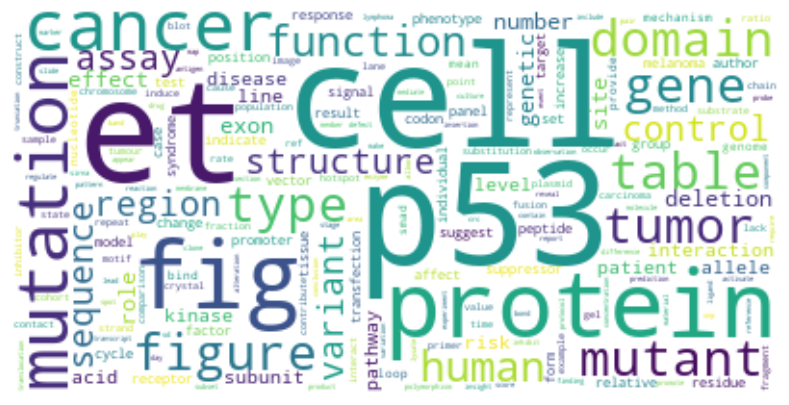

In [35]:
plot_wordCloud(df = trainData,Class = 1)

Word Cloud Visualization of Class 1

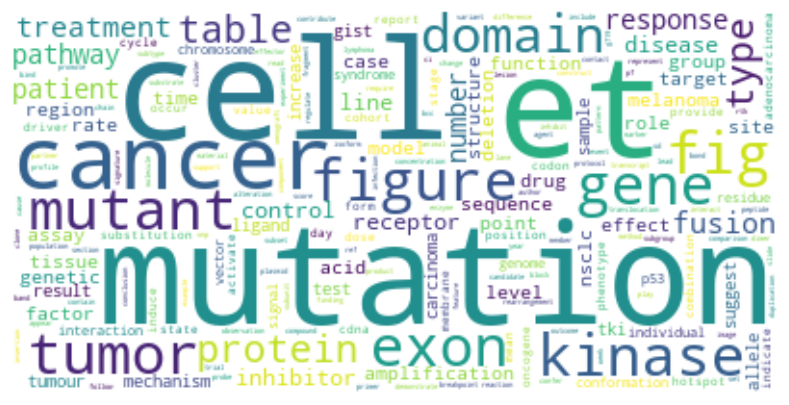

In [36]:
plot_wordCloud(df = trainData,Class = 2)

Word Cloud Visualization of Class 2

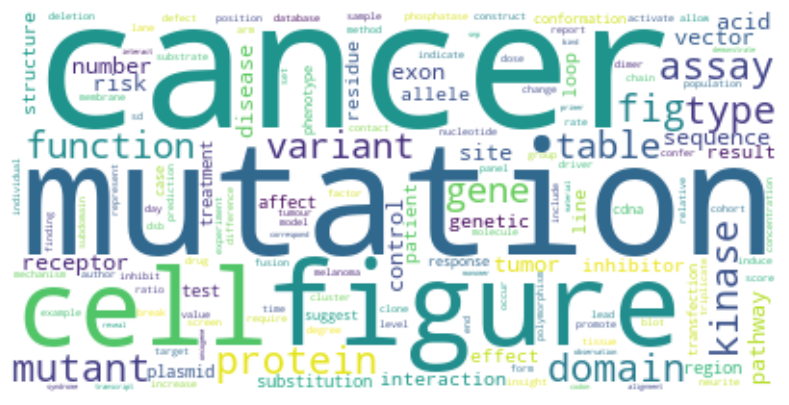

In [37]:
plot_wordCloud(df = trainData,Class = 3)

Word Cloud Visualization of Class 3

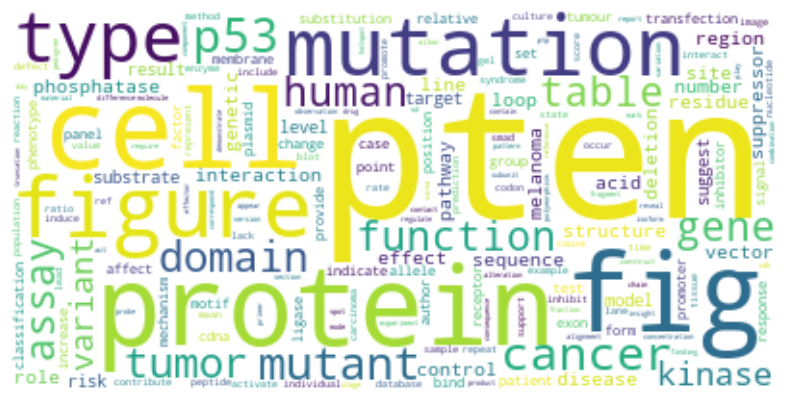

In [38]:
plot_wordCloud(df = trainData,Class = 4)

Word Cloud Visualization of Class 4

Text(0.5, 1.0, 'Count of Gene in Each Class')

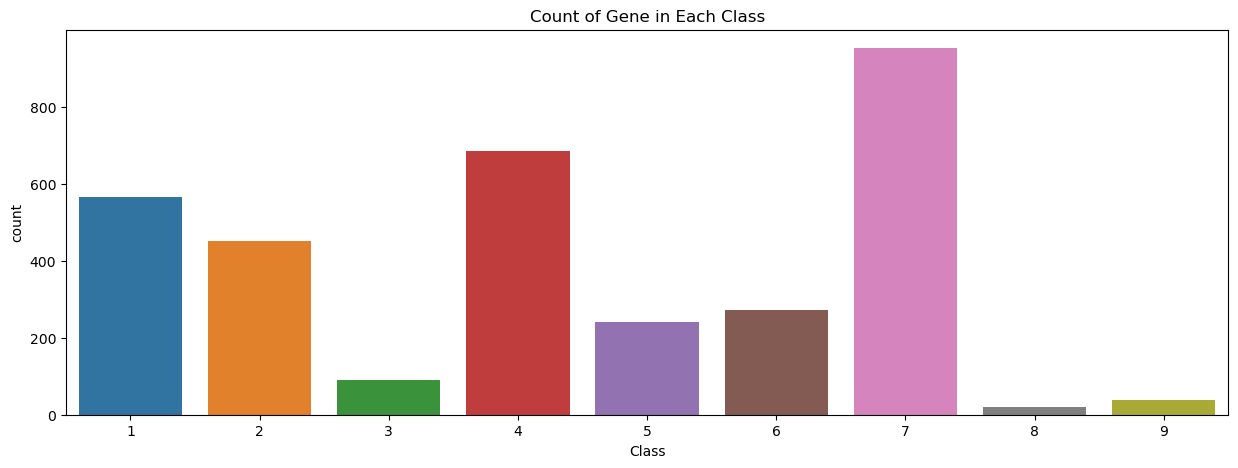

In [39]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x = 'Class',y = 'count',data= df)
plt.title('Count of Gene in Each Class')

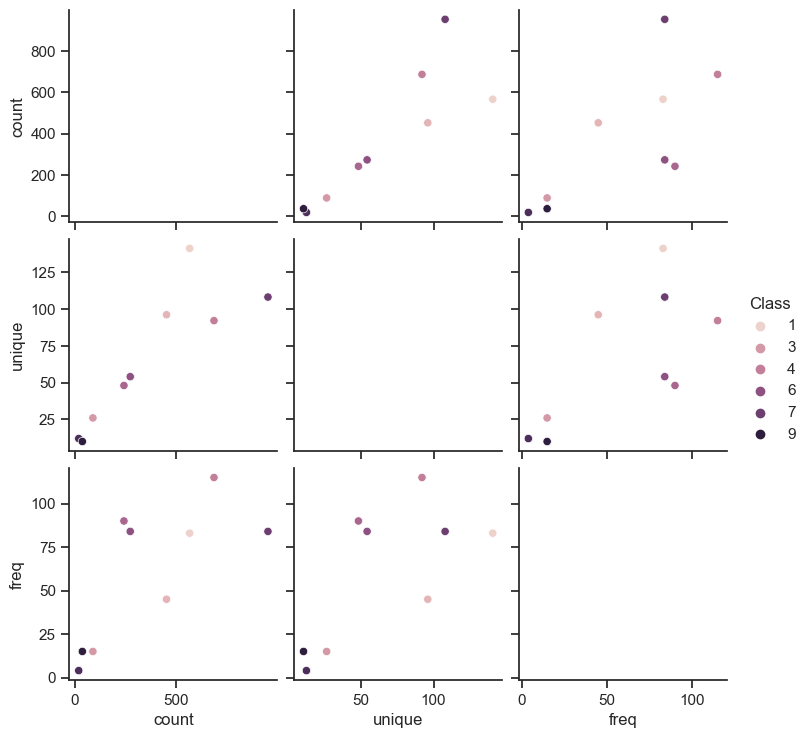

In [40]:
#sns.scatterplot(x = 'Class', y='count', data=df)

sns.set_theme(style="ticks")

sns.pairplot(df, hue="Class")


Pair plots of various variables

Text(0.5, 1.0, 'Histogram of Gene variable')

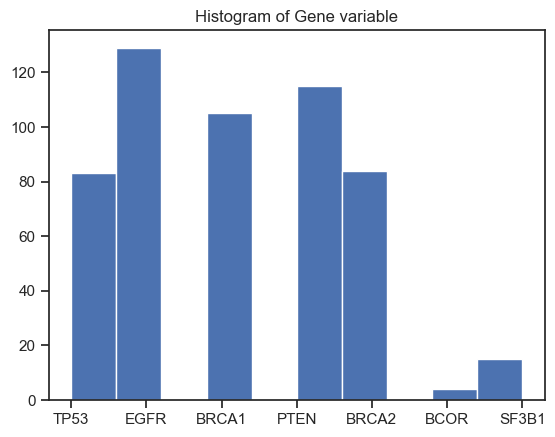

In [41]:
plt.hist(df["top"], weights= df["freq"])
#plt.hist(trainData["Gene"])
#plt.xticks(rotation=90)
plt.title("Histogram of Gene variable")

Text(0.5, 1.0, 'Pie Chart of Class variable')

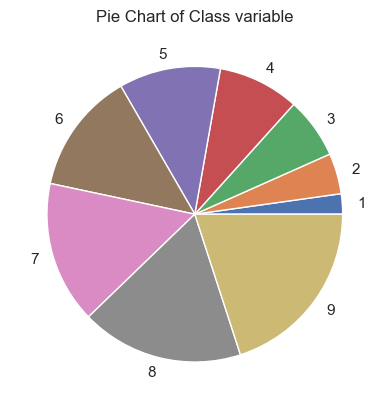

In [42]:
plt.pie(df["Class"], labels= df["Class"])
plt.title("Pie Chart of Class variable")

Text(0.5, 1.0, 'Count Plot for Class')

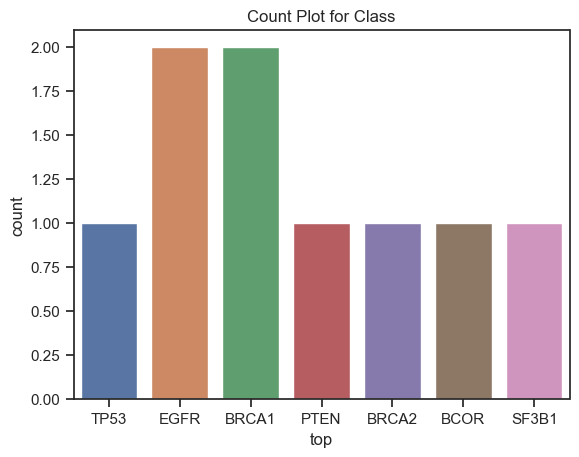

In [43]:
sns.countplot(x='top',data=df)
plt.title("Count Plot for Class")

Text(0.5, 1.0, 'Box plot showing distribution for Class')

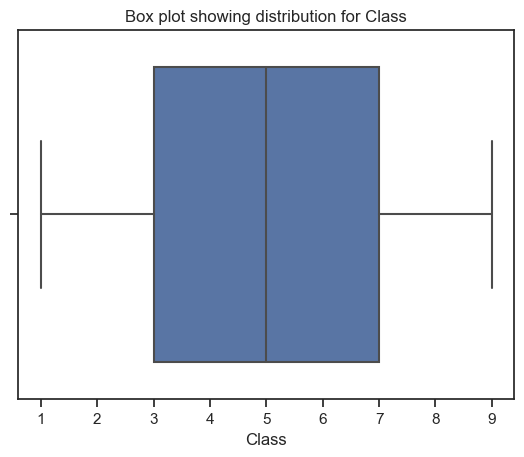

In [44]:
sns.boxplot(x="Class", data=df)
plt.title("Box plot showing distribution for Class")

Text(0.5, 1.0, 'Box plot showing distribution for Class and count')

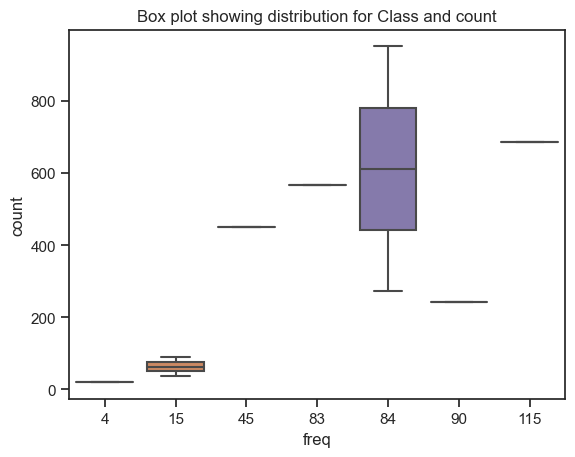

In [45]:
sns.boxplot(x="freq", y="count", data=df)
plt.title("Box plot showing distribution for Class and count")

Text(0.5, 1.0, 'Joint plot of CLass and Count')

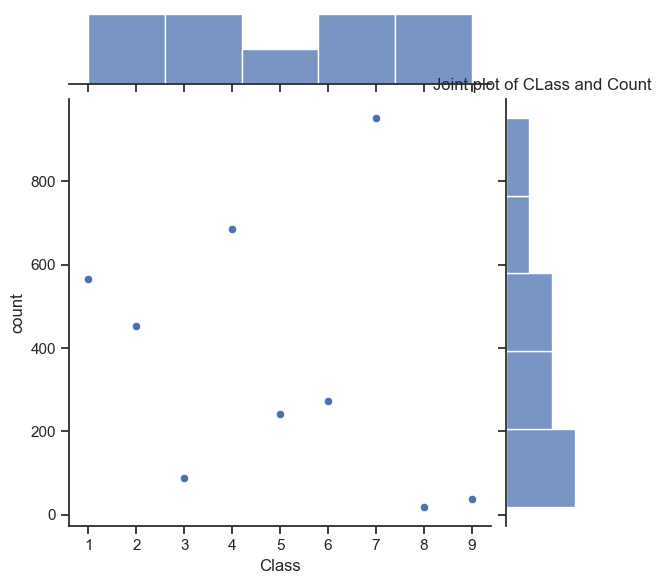

In [46]:
sns.jointplot(x='Class', y='count', data=df, kind='scatter')
plt.title("Joint plot of CLass and Count")

/Users/manasak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of Frequency variable')

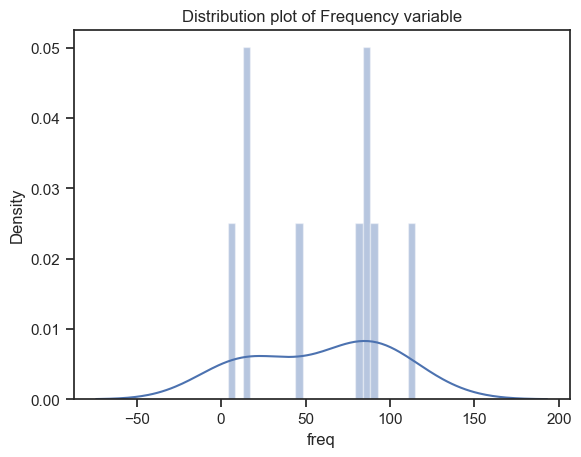

In [47]:
sns.distplot(df['freq'],bins=25, kde=True)
plt.title("Distribution plot of Frequency variable")

Text(0.5, 1.0, 'Scatter plot Grid')

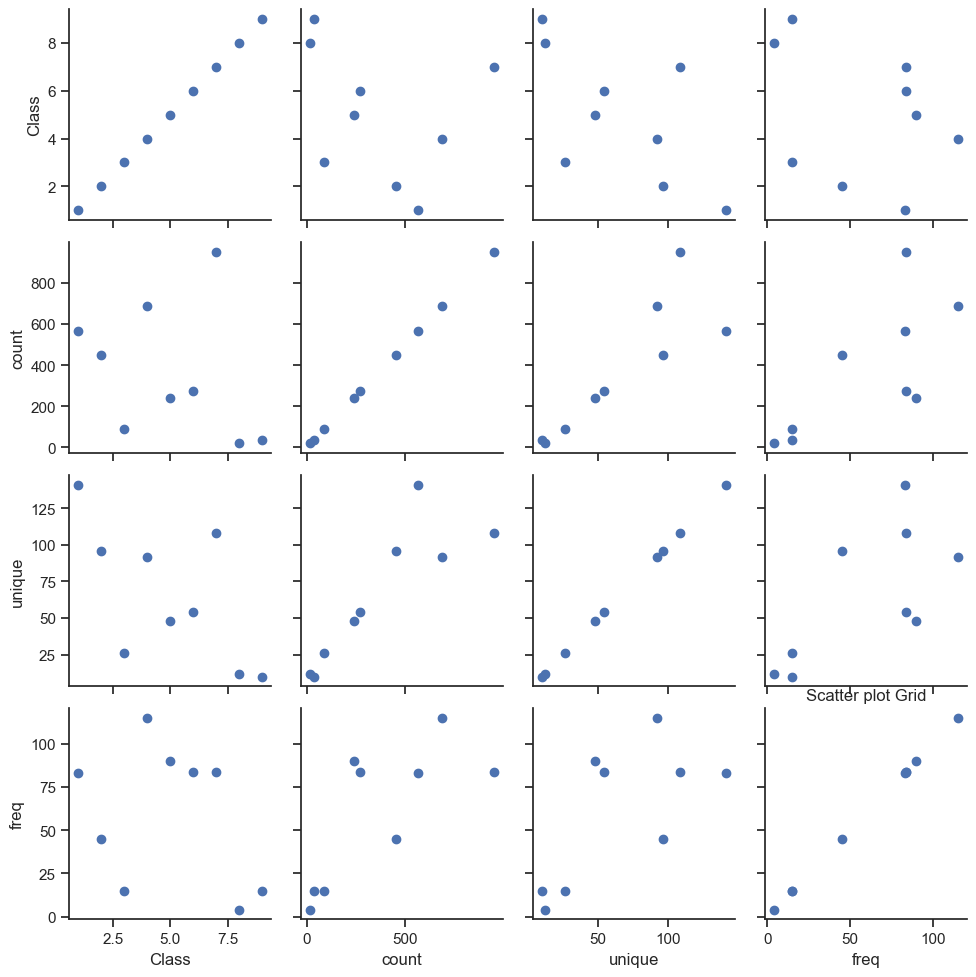

In [48]:
grids=sns.PairGrid(df)
grids.map(plt.scatter)
plt.title("Scatter plot Grid")

Unsupervised Learning- Clustering:

#### Import NLTK library to remove stop words & other related libraries

In [49]:
import nltk
from nltk.corpus import stopwords
from subprocess import check_output
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manasak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stopwords = set(stopwords.words('english'))

In [52]:
train = pd.read_csv('training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
train.head()

ID                                               Text
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [53]:
len(train['Text'][0].split())
train = train[train['Text'].notnull()]

In [54]:
train['len_text'] = train['Text'].apply(lambda x: len(x.split()))

In [55]:
train['Text'] = train['Text'].apply(lambda x : " ".join([word for word in x.lower().split() if word not in stopwords]))

In [56]:
vect = TfidfVectorizer()
X = vect.fit_transform(train['Text'])
#X = vect.fit_transform(train['Text'][1:100])

#### Import KMeans libraries

In [57]:
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score

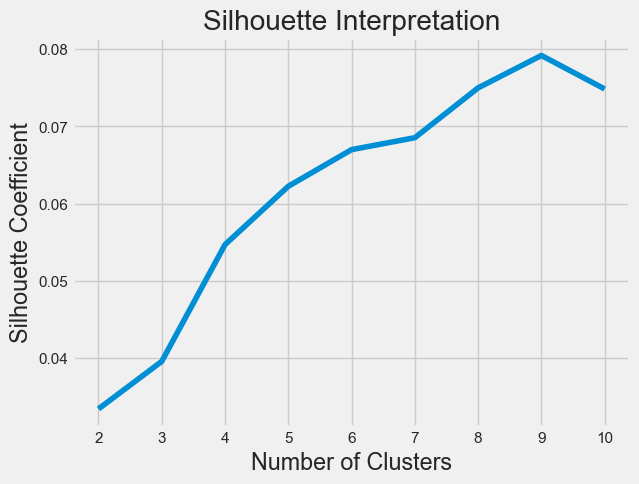

In [58]:
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Interpretation")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.03306250131710177
For n_clusters = 3 The average silhouette_score is : 0.04935450189075764
For n_clusters = 4 The average silhouette_score is : 0.05647245393680728
For n_clusters = 5 The average silhouette_score is : 0.06168067398265208
For n_clusters = 6 The average silhouette_score is : 0.06724092477873568
For n_clusters = 7 The average silhouette_score is : 0.07324364026014987
For n_clusters = 8 The average silhouette_score is : 0.06931317298622876
For n_clusters = 9 The average silhouette_score is : 0.07876090022181341
For n_clusters = 10 The average silhouette_score is : 0.08415591754639927


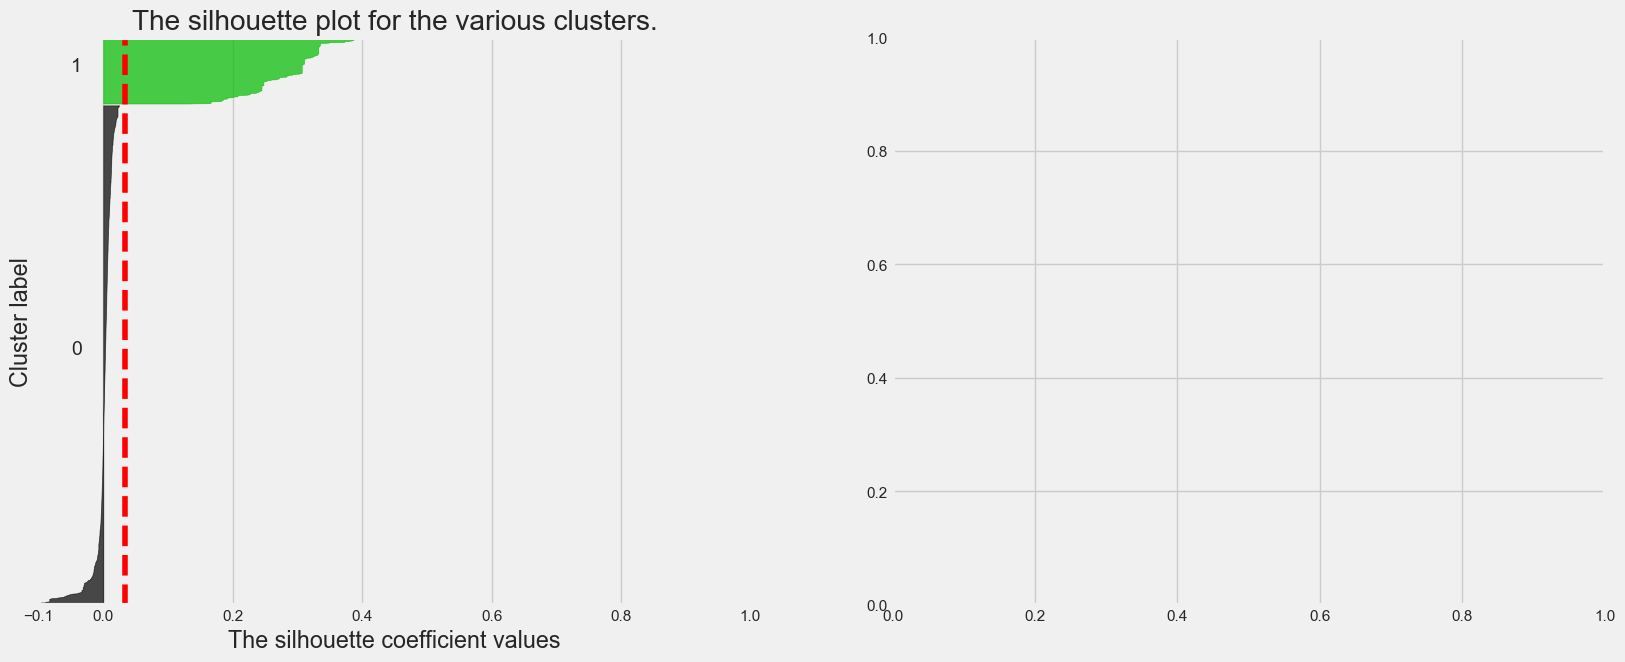

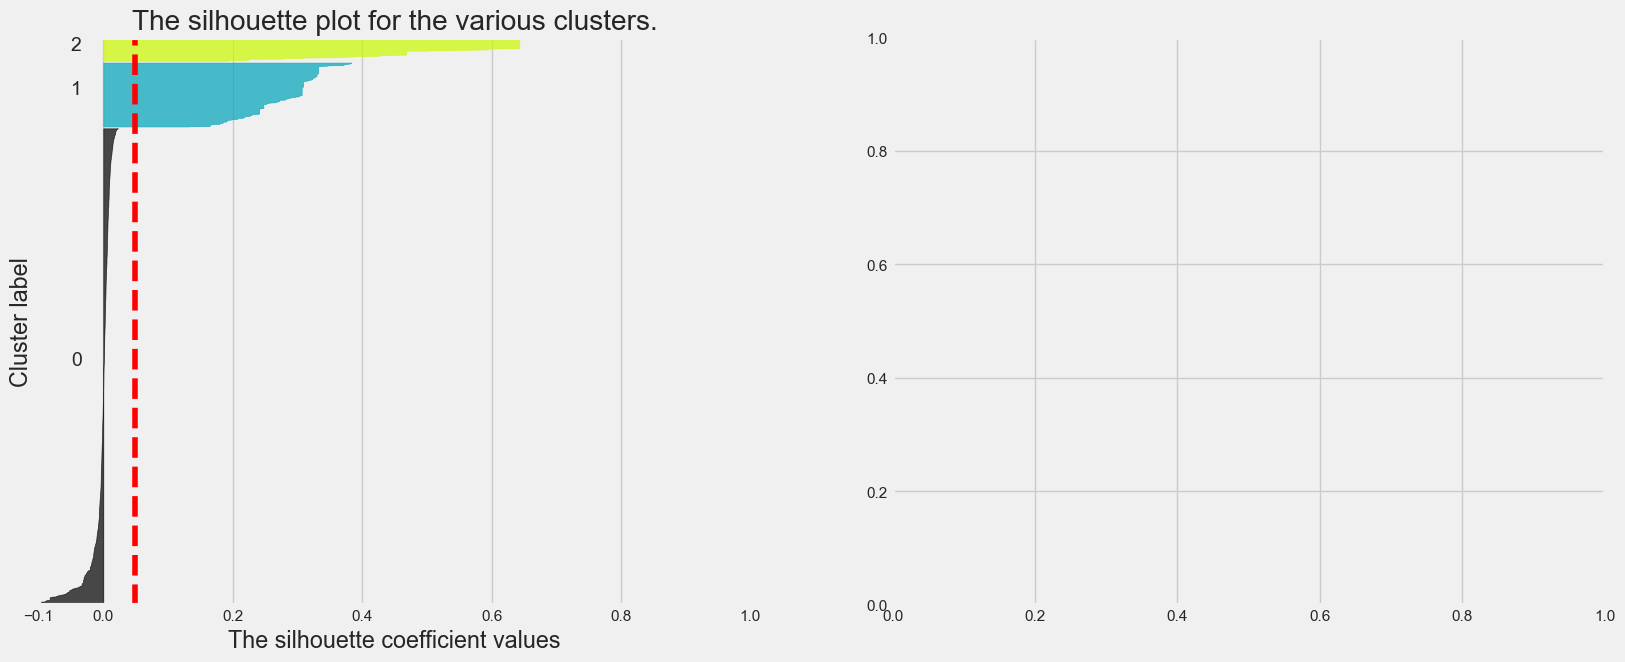

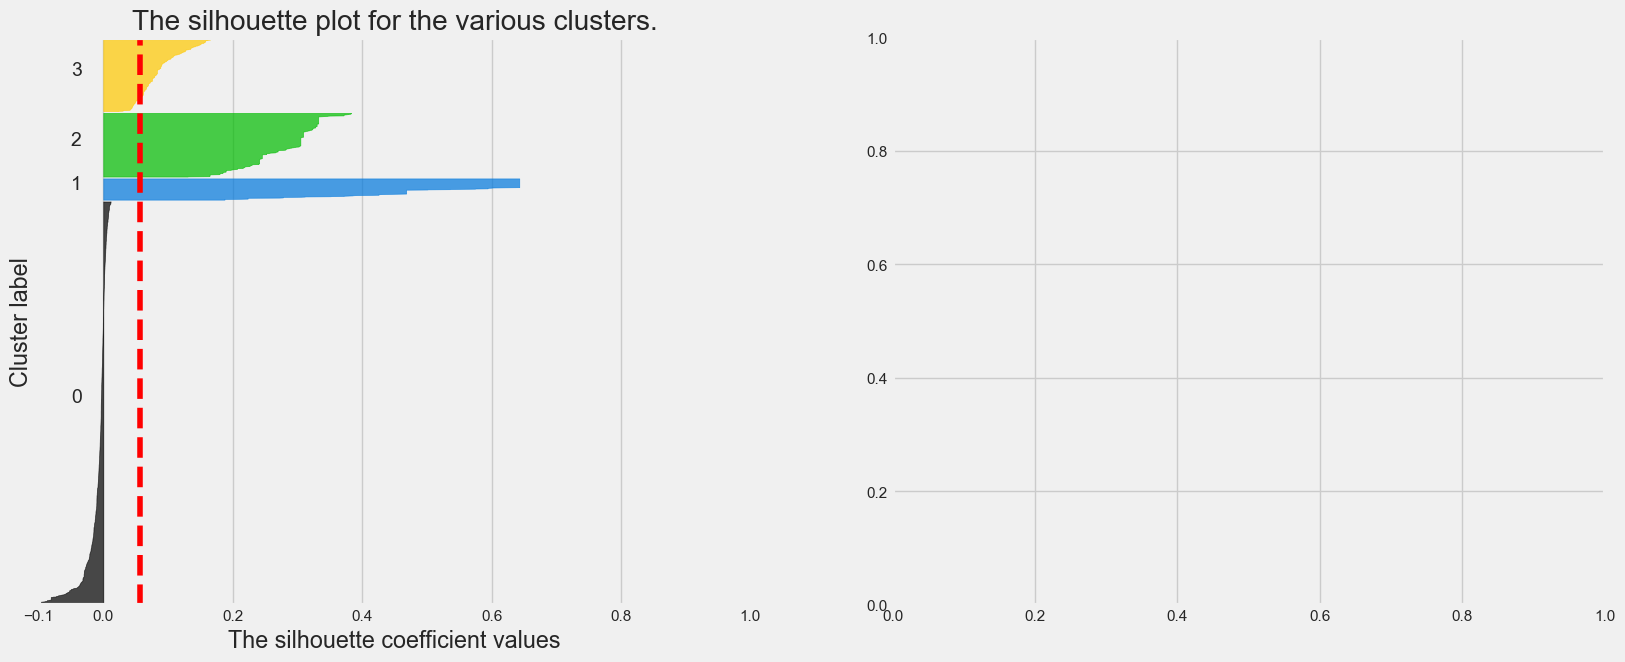

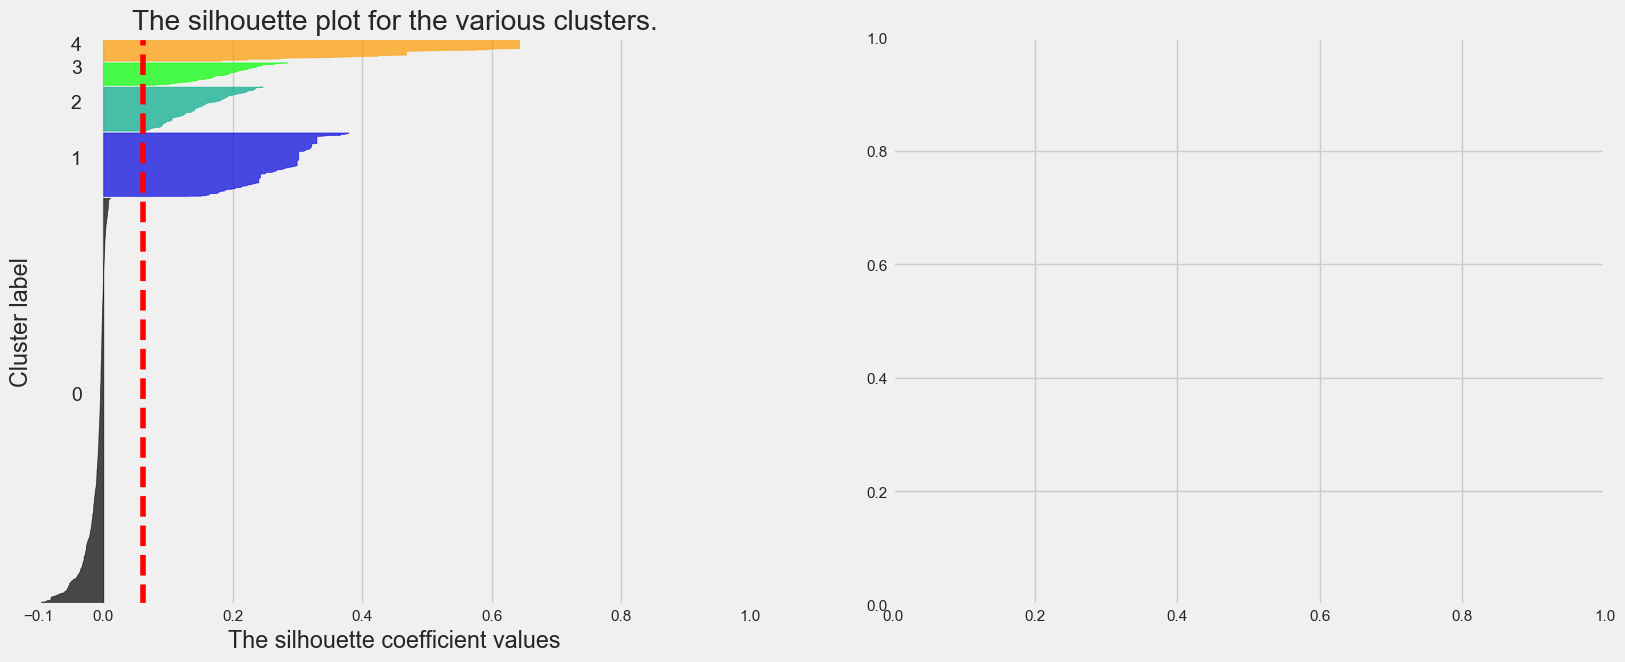

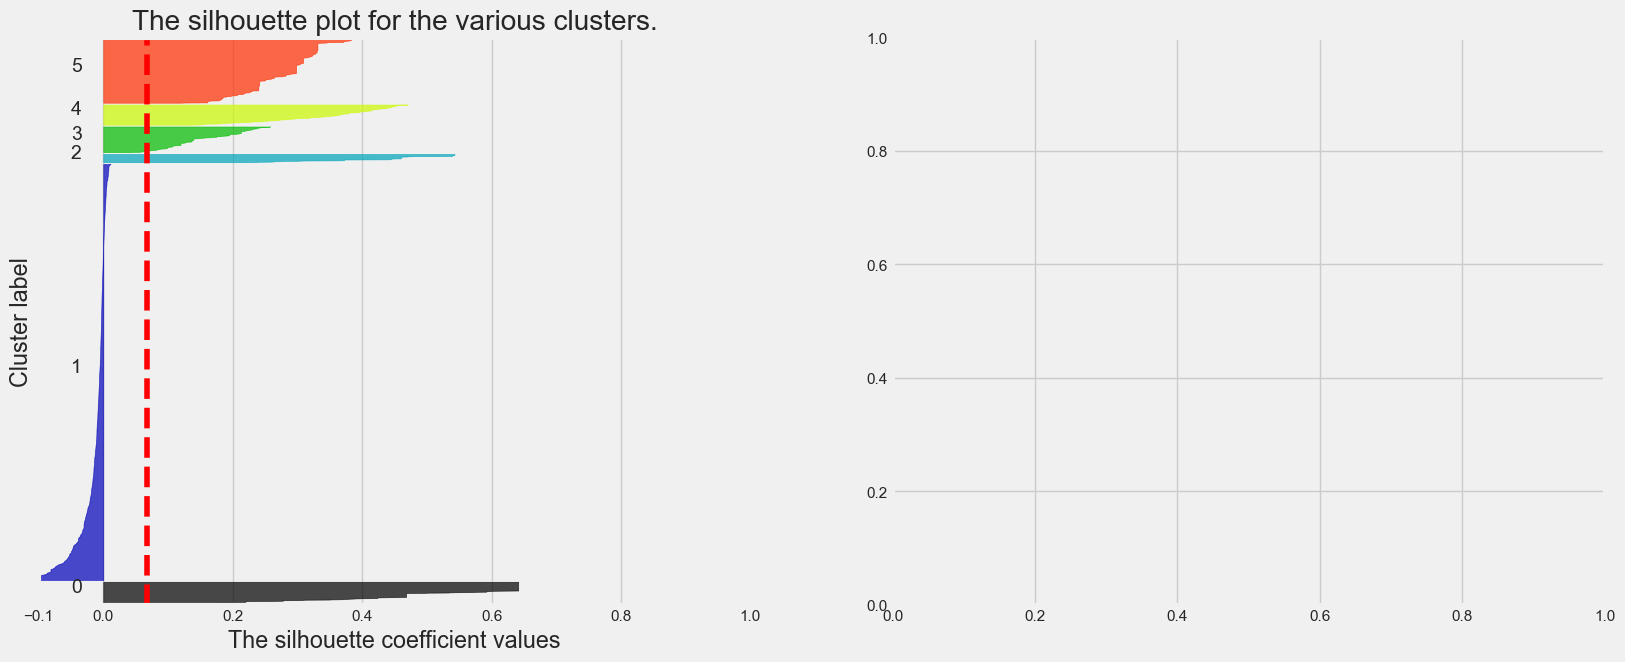

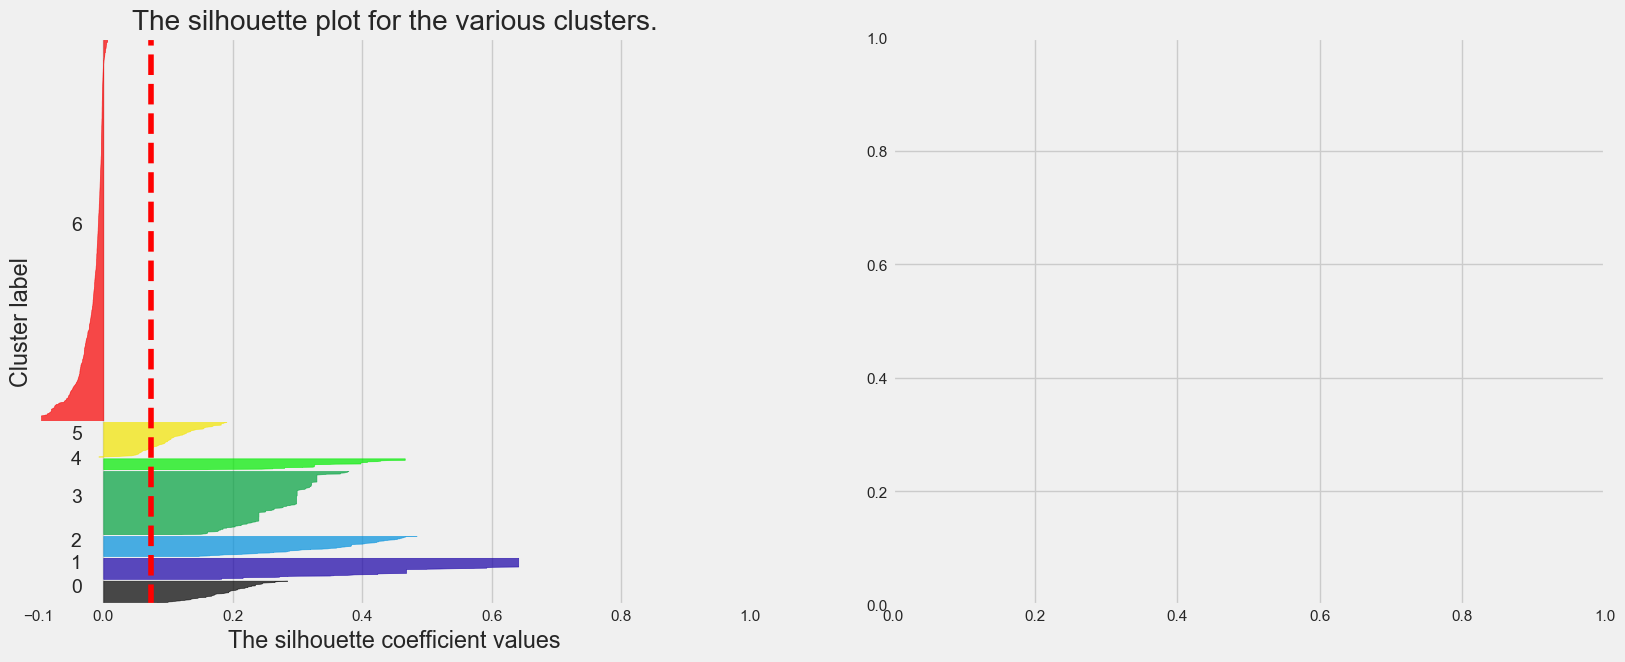

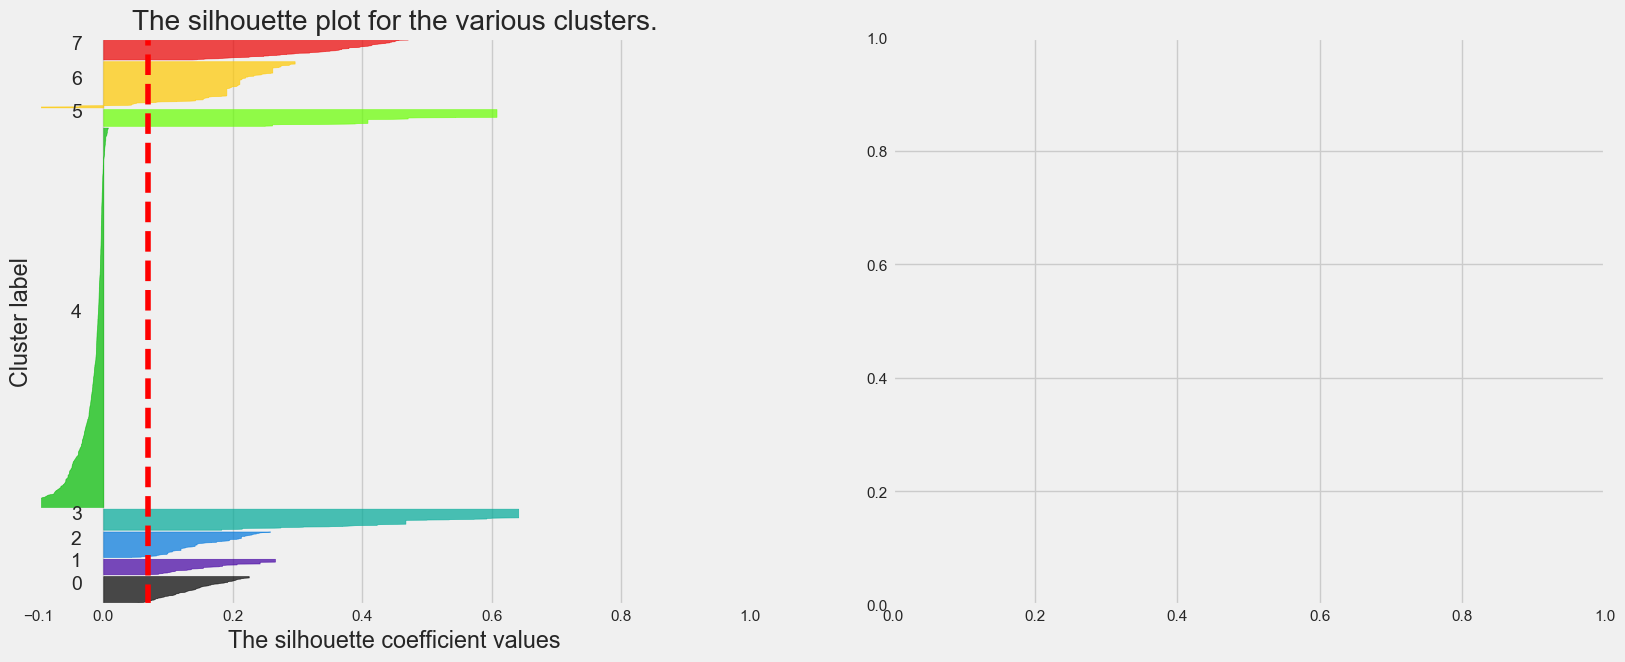

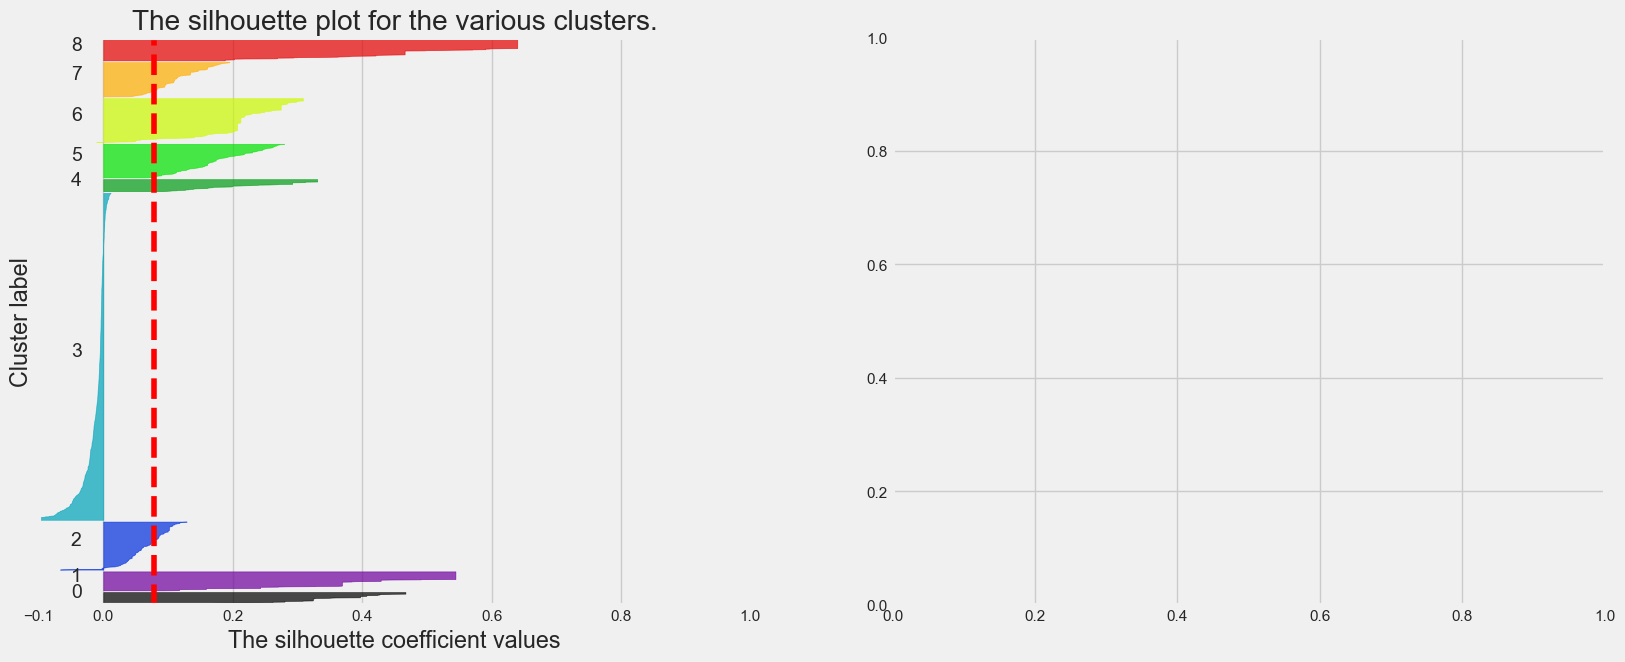

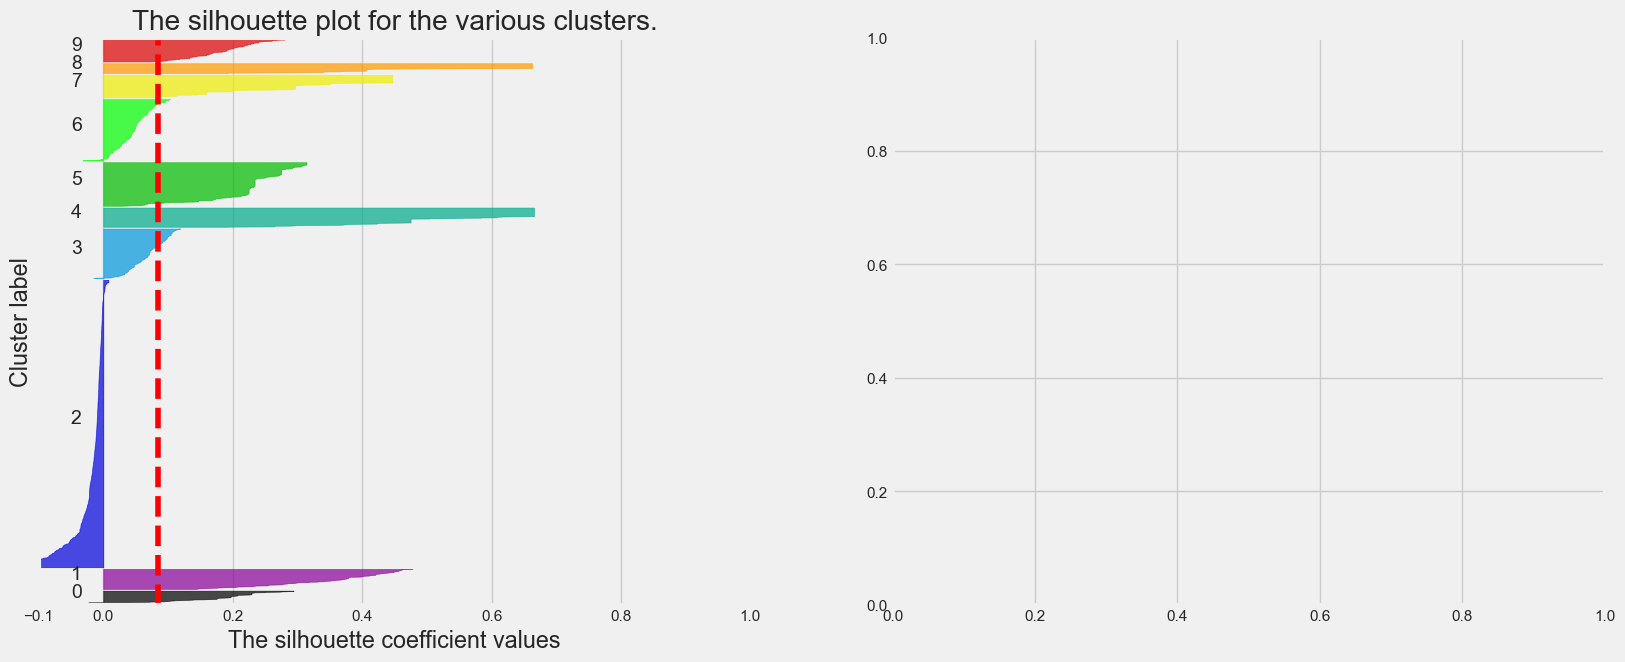

In [59]:
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [i for i in range(2,11)]

                          
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



plt.show()

In [60]:
# Using 9 clusters from above inference
km = KMeans(n_clusters=9)
km.fit(X)
My_labels=km.predict(X)
print(My_labels)

[1 1 1 ... 1 1 1]


In [61]:
# https://stackoverflow.com/questions/27889873/clustering-text-documents-using-scikit-learn-kmeans-in-python
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(9):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
    print()

Top terms per cluster:
Cluster 0:
 p53
 p53s
 mutant
 mutants
 dna
 mutations
 cells
 binding
 transactivation
 apoptosis
 type
 tp53
 dsred
 wild
 h115n
 fig
 tetramer
 protein
 activity
 core

Cluster 1:
 mutations
 cells
 cell
 al
 fig
 et
 figure
 mutation
 cancer
 ras
 kinase
 raf
 braf
 mutant
 expression
 protein
 patients
 tumor
 gene
 activity

Cluster 2:
 brca2
 brca1
 deleterious
 vus
 variants
 brca
 odds
 vuss
 causality
 neutral
 history
 variant
 family
 00
 loh
 favor
 likelihood
 mutations
 mutation
 cancer

Cluster 3:
 brca1
 brct
 variants
 vus
 neutral
 mutations
 cancer
 functional
 manuscript
 assays
 protein
 fig
 transcriptional
 author
 e2
 variant
 missense
 classifi
 phosphopeptide
 assay

Cluster 4:
 alk
 crizotinib
 ros1
 neuroblastoma
 mutations
 resistance
 ceritinib
 eml4
 ba
 cell
 cells
 al
 et
 f3
 kinase
 f1174l
 fig
 nsclc
 ap26113
 tkd

Cluster 5:
 tsc2
 tsc1
 s6k
 tsc
 t389
 variants
 variant
 r611q
 pathogenic
 wild
 type
 tuberin
 torc1
 supp
 a

/Users/manasak/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
#Dr G Code from website: https://gatesboltonanalytics.com/?page_id=262
#km2 = KMeans(n_clusters=10)
#km2.fit(X)
#My_labels2=km2.predict(X)

print("Silhouette Score for k = 9 \n",silhouette_score(X, km.labels_))
#print("Silhouette Score for k = 10 \n",silhouette_score(X, My_labels2))

Silhouette Score for k = 9 
 0.08354102156798077


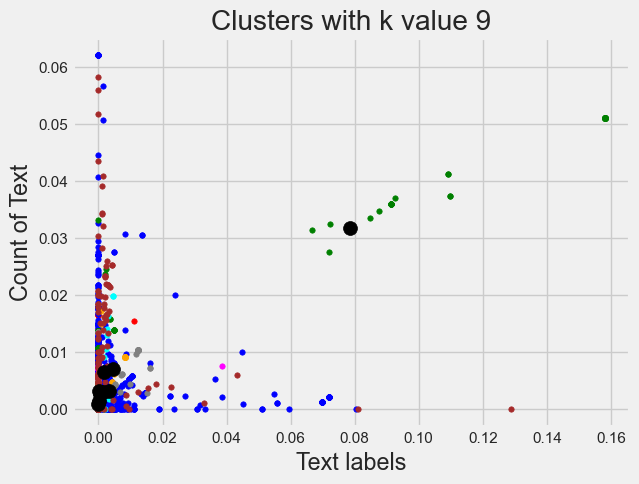

In [63]:
#plt.plot(range(1,11),my_list)
#plt.show()



#kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
#y_kmeans = kmeans.fit_predict(x)

plt.scatter(X[My_labels == 0,0].toarray(), X[My_labels==0,1].toarray(), s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(X[My_labels == 1,0].toarray(), X[My_labels==1,1].toarray(), s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(X[My_labels == 2,0].toarray(), X[My_labels==2,1].toarray(), s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(X[My_labels == 3,0].toarray(), X[My_labels==3,1].toarray(), s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(X[My_labels == 4,0].toarray(), X[My_labels==4,1].toarray(), s = 15, c= 'magenta', label = 'Cluster_5')
plt.scatter(X[My_labels == 5,0].toarray(), X[My_labels==5,1].toarray(), s = 15, c= 'orange', label = 'Cluster_6')
plt.scatter(X[My_labels == 6,0].toarray(), X[My_labels==6,1].toarray(), s = 15, c= 'grey', label = 'Cluster_7')
plt.scatter(X[My_labels == 7,0].toarray(), X[My_labels==7,1].toarray(), s = 15, c= 'yellow', label = 'Cluster_8')
plt.scatter(X[My_labels == 8,0].toarray(), X[My_labels==8,1].toarray(), s = 15, c= 'brown', label = 'Cluster_9')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters with k value 9')
plt.xlabel('Text labels')
plt.ylabel('Count of Text')
plt.show()

In [64]:
trainData[km.labels_ == 0].groupby('Class').size()

Class
1    72
2     3
4    51
5     2
6     5
7     1
dtype: int64

In [65]:
trainData[km.labels_ == 1].groupby('Class').size()

Class
1    391
2    326
3     44
4    431
5    115
6    128
7    740
8     19
9     37
dtype: int64

In [66]:
trainData[km.labels_ == 2].groupby('Class').size()

Class
1    10
4     2
5    19
6    84
dtype: int64

In [67]:
trainData[km.labels_ == 3].groupby('Class').size()

Class
1    61
3    15
4    47
5    90
6    52
dtype: int64

In [68]:
trainData[km.labels_ == 4].groupby('Class').size()

Class
2    20
3    10
5     5
6     1
7    53
dtype: int64

In [69]:
trainData[km.labels_ == 5].groupby('Class').size()

Class
1    24
3     6
4    28
5     1
7     1
dtype: int64

In [70]:
trainData[km.labels_ == 6].groupby('Class').size()

Class
1      2
3      5
4    112
5      4
6      1
7      3
dtype: int64

In [71]:
trainData[km.labels_ == 7].groupby('Class').size()

Class
1     3
2     2
4    10
7    17
dtype: int64

In [72]:
trainData[km.labels_ == 8].groupby('Class').size()

Class
1      3
2    101
3      9
4      5
5      6
6      2
7    137
dtype: int64

In [73]:
new_column_names = ['ID', 'Gene','Variation','Class']
training_variants.to_csv('ClusterTrainData.csv', index=False, header=new_column_names)

In [74]:
training_variants_clustering = pd.read_csv('ClusterTrainData.csv')
fin_clus_dataset_text =  training_variants.iloc[: , 1:]
fin_clus_dataset_num = training_variants.iloc[: , [0,3]]

In [75]:
training_variants.head()

ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [76]:
fin_clus_dataset_text.head()

Gene             Variation  Class
0  FAM58A  Truncating Mutations      1
1     CBL                 W802*      2
2     CBL                 Q249E      2
3     CBL                 N454D      3
4     CBL                 L399V      4

In [77]:
fin_clus_dataset_num.head()

ID  Class
0   0      1
1   1      2
2   2      2
3   3      3
4   4      4

In [78]:
from sklearn.cluster import KMeans

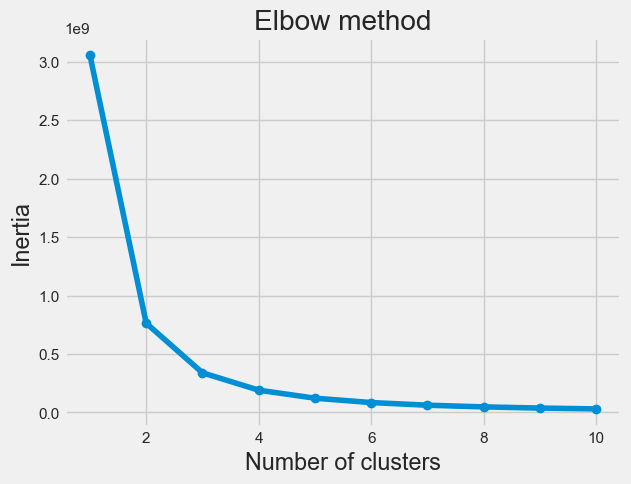

In [79]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(fin_clus_dataset_num)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

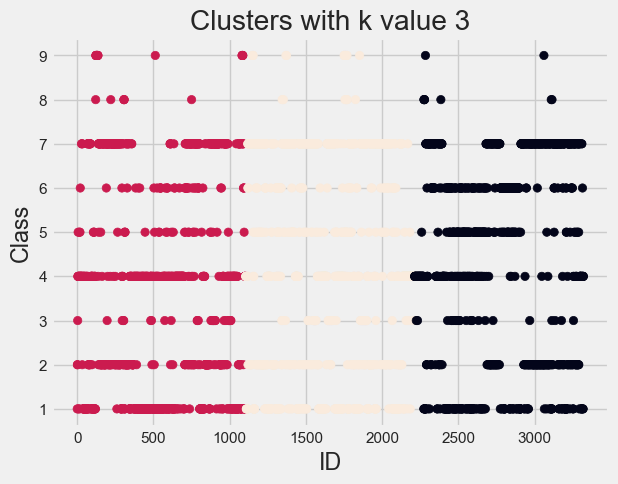

In [80]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(fin_clus_dataset_num)

x=fin_clus_dataset_num.iloc[:,0] ## ID
y=fin_clus_dataset_num.iloc[:,1] ## CLASS

plt.scatter(x, y, c=kmeans.labels_)
plt.title('Clusters with k value 3')
plt.xlabel('ID')
plt.ylabel('Class')
plt.show()

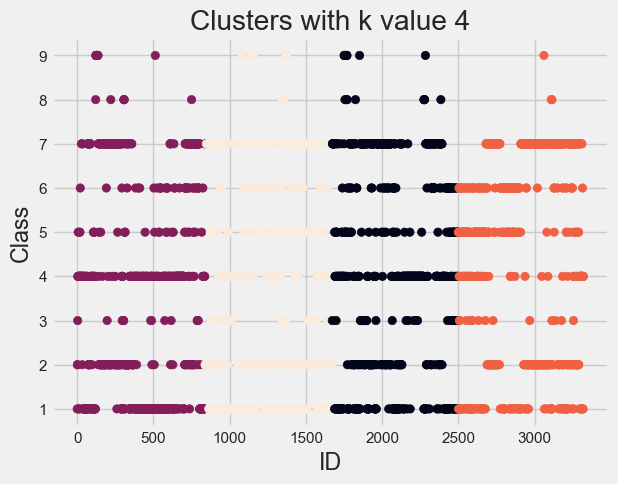

In [81]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(fin_clus_dataset_num)

x=fin_clus_dataset_num.iloc[:,0] ## ID
y=fin_clus_dataset_num.iloc[:,1] ## CLASS

plt.scatter(x, y, c=kmeans2.labels_)
plt.title('Clusters with k value 4')
plt.xlabel('ID')
plt.ylabel('Class')
plt.show()

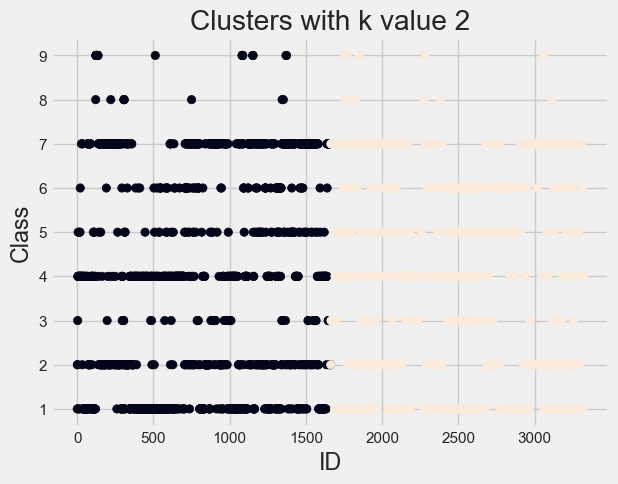

In [82]:
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(fin_clus_dataset_num)

x=fin_clus_dataset_num.iloc[:,0] ## ID
y=fin_clus_dataset_num.iloc[:,1] ## CLASS

plt.scatter(x, y, c=kmeans3.labels_)
plt.title('Clusters with k value 2')
plt.xlabel('ID')
plt.ylabel('Class')
plt.show()

In [83]:
hm_data_id = fin_clus_dataset_num.iloc[:,:1]
hm_data_id.head()

ID
0   0
1   1
2   2
3   3
4   4

In [84]:
hm_data_class = fin_clus_dataset_num.iloc[:,1:]
hm_data_class.head()

Class
0      1
1      2
2      2
3      3
4      4

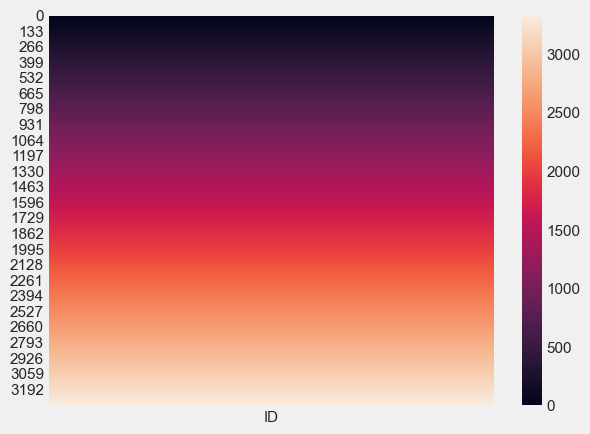

In [85]:
import seaborn as sn
# plotting the heatmap

hm = sn.heatmap(data = hm_data_id)
  
# displaying the plotted heatmap
plt.show()

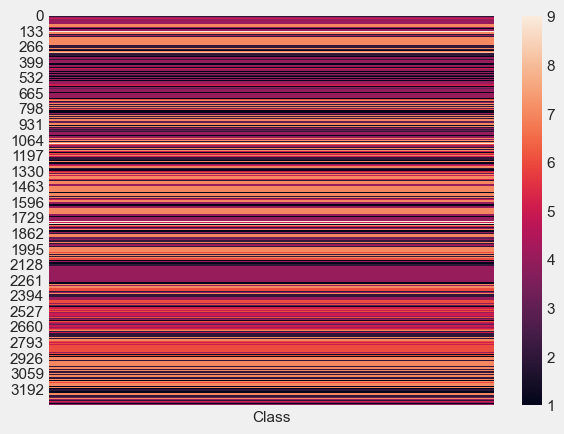

In [86]:
# plotting the heatmap

hm = sn.heatmap(data = hm_data_class)
  
# displaying the plotted heatmap
plt.show()

In [87]:
model = KModes(init='Huang', n_clusters=4, verbose=3)

clusters = model.fit(fin_clus_dataset)

NameError: name 'fin_clus_dataset' is not defined

In [ ]:
print(model.cluster_centroids_)

In [ ]:
#plot(fin_clus_dataset, col=clus\$cluster)

# Naive Bayes Classification

In [88]:
trainData.head()

ID    Gene             Variation  \
0   0  FAM58A  Truncating Mutations   
1   1     CBL                 W802*   
2   2     CBL                 Q249E   
3   3     CBL                 N454D   
4   4     CBL                 L399V   

                                                TEXT  Class  
0  cyclin dependent kinases cdks regulate a varie...      1  
1  abstract background non small cell lung cancer...      2  
2  abstract background non small cell lung cancer...      2  
3  recent evidence has demonstrated that acquired...      3  
4  oncogenic mutations in the monomeric casitas b...      4

In [89]:
y_true = trainData['Class'].values
trainData['Gene']      = trainData['Gene'].str.replace('\s+', '_')
trainData['Variation'] = trainData['Variation'].str.replace('\s+', '_')

/var/folders/3z/0y2_w0b11r7d0tynjxbry4zh0000gn/T/ipykernel_1374/3873351831.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  trainData['Gene']      = trainData['Gene'].str.replace('\s+', '_')
/var/folders/3z/0y2_w0b11r7d0tynjxbry4zh0000gn/T/ipykernel_1374/3873351831.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  trainData['Variation'] = trainData['Variation'].str.replace('\s+', '_')


In [90]:
# Breaking up all data: 80 Train / 20 Test
from sklearn.model_selection import train_test_split
X_train, test_df, y_train, y_test = train_test_split(trainData, y_true, stratify = y_true, test_size=0.2)

In [91]:
# Breaking up test data: 80 Train / 20 Validation
train_df, cv_df, y_train, y_cv = train_test_split(X_train,y_train,stratify = y_train, test_size=0.2 )

In [92]:
print('Data points in train data:', train_df.shape[0])
print('Data points in test data:', test_df.shape[0])
print('Data points in cross validation data:', cv_df.shape[0])

Data points in train data: 2121
Data points in test data: 664
Data points in cross validation data: 531


In [93]:
train_df.head()

ID    Gene         Variation  \
784    784   ERBB4  EZR-ERBB4_Fusion   
2152  2152    PTEN              A34D   
3082  3082  NOTCH1            I1616T   
3047  3047     KIT             R796G   
418    418    TP53             R110L   

                                                   TEXT  Class  
784   purpose to identify druggable oncogenic fusion...      7  
2152  the pten phosphatase and tensin homolog phosph...      4  
3082  the majority of human pancreatic cancers have ...      7  
3047  the ras mitogen activated protein kinase mapk ...      4  
418   many p53 missense mutations possess dominant n...      1

In [94]:
test_df.head()

ID   Gene      Variation  \
2597  2597  BRCA1           S59R   
2594  2594  BRCA1           E60L   
1079  1079   MDM2  Amplification   
3131  3131   KRAS          R164Q   
2126  2126  CCND1           C47S   

                                                   TEXT  Class  
2597  germline mutations of the breast cancer 1 brca...      6  
2594  germline mutations of the breast cancer 1 brca...      6  
1079  abstract the p53 tumor suppressor gene is inac...      7  
3131  hotspot mutations of ras drive cell transforma...      6  
2126  this is a comprehensive whole genome whole exo...      7

In [95]:
cv_df.head()

ID    Gene     Variation  \
2123  2123   CCND1  256_286trunc   
874    874  PDGFRA         H845Y   
2606  2606   BRCA1          C39R   
3071  3071  NOTCH1        L1600P   
1447  1447    SPOP         N296I   

                                                   TEXT  Class  
2123  abstract a gene expression signature of tumor ...      7  
874   purpose platelet derived growth factor recepto...      7  
2606  germline mutations of the breast cancer 1 brca...      6  
3071  the majority of human pancreatic cancers have ...      7  
1447  in the largest e3 ligase subfamily cul3 binds ...      1

Text(0, 0.5, '% Of total data')

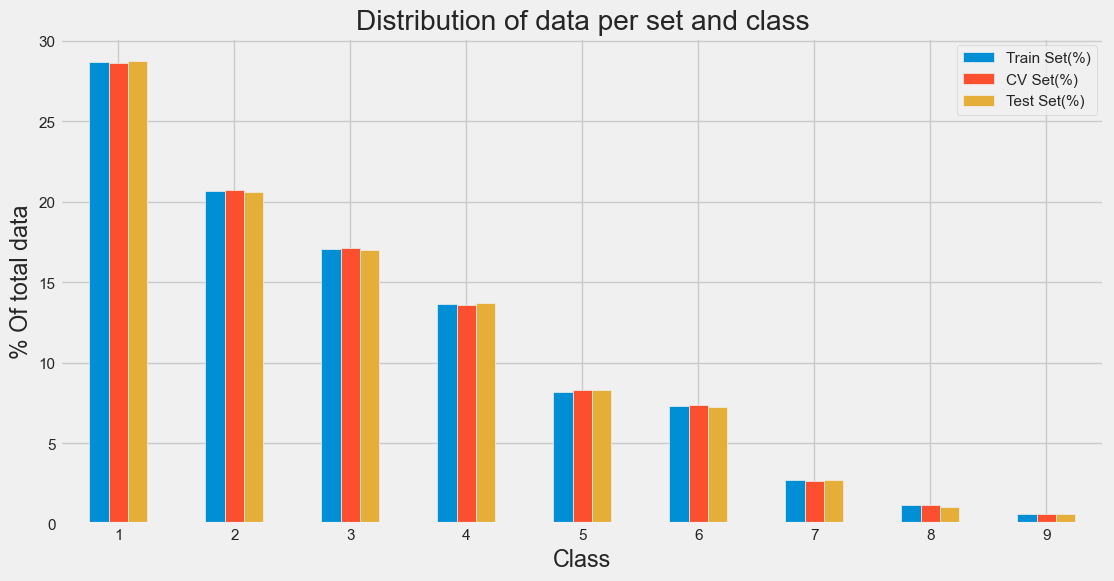

In [96]:
train_set = []
cv_set = []
test_set = []

train_class_distribution = train_df['Class'].value_counts()
test_class_distribution = test_df['Class'].value_counts()
cv_class_distribution = cv_df['Class'].value_counts()

sorted_train = np.argsort(-train_class_distribution.values)
sorted_test = np.argsort(-test_class_distribution.values)
sorted_cv = np.argsort(-cv_class_distribution.values)

for i in sorted_train:
    train_set.append(np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3))
for i in sorted_test:
    test_set.append(np.round((test_class_distribution.values[i]/test_df.shape[0]*100),3))
for i in sorted_cv:
    cv_set.append(np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3))

distribution_per_set = pd.DataFrame(
    {
     'Train Set(%)': train_set,
     'CV Set(%)': cv_set,
     'Test Set(%)':test_set
    })

# Plotting Distribution per class 
distribution_per_set.index = distribution_per_set.index + 1
distribution_per_set.plot.bar(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Distribution of data per set and class')
plt.xlabel('Class')
plt.ylabel('% Of total data')

Random Model Generation:

The idea behind random model is to create a reference error value (True - Generated), based on randomly generated value This reference error gives a sense of how well our build model performce against the randomly generated values

How we construct random model for our multiclassification case:

Generate series filled with random probabilities

Log_loss is used to measure the accuracy

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/rand_probs.sum())[0])

cv_log_loss = round(log_loss(y_cv,cv_predicted_y, eps=1e-15),2)

print("Log loss on Cross Validation Data using Random Model",cv_log_loss)

# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/rand_probs.sum())[0])
test_log_loss = round(log_loss(y_test,test_predicted_y, eps=1e-15),2)

print("Log loss on Test Data using Random Model",test_log_loss)

Log loss on Cross Validation Data using Random Model 2.54
Log loss on Test Data using Random Model 2.51


Looks like 2.5 will be our reference point. The closer the log loss of our model gets to 2.5 the worse our model is!

To evaluate the performance of random and later real ML models we will use the following matrices:

Confusion Matrix

Layman: Confusion matrix is used to get a sense of how accurate our model classifies data
If models performs well, cells arranged diaganally will have higher correlation

Recall Matrix

Layman: Can be thought as model’s ability to find all the data points of interest in a dataset
Mathematical: True Positive / ( True Positive + False Negative )

Precision Matrix

Layman: Precision identifyies proportion of the data points model classifies as relavant to actually be relavant
Mathematical: True Positive / ( True positve + False Positive )

In [98]:
predicted_y =np.argmax(test_predicted_y, axis=1)
# Since class values vary for 0-8. And we have 1-9. Apply n+1 formula to make it 1-9 
predicted_y = predicted_y+1

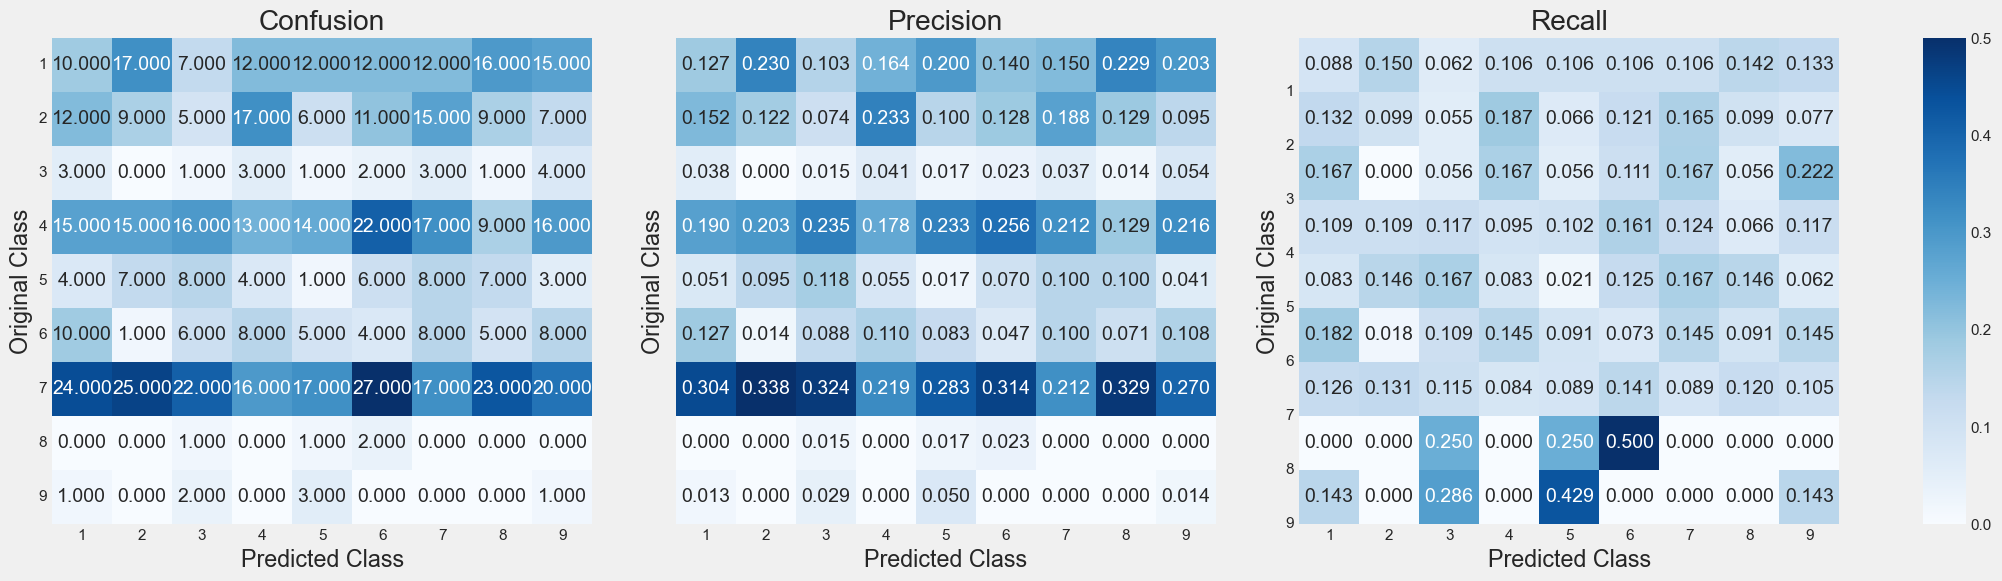

In [99]:
def plot_matrices(y_test,predicted_y):  

    confusion = confusion_matrix(y_test, predicted_y)
    precision =(confusion/confusion.sum(axis=0))
    recall =(((confusion.T)/(confusion.sum(axis=1))).T)
    
    f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
                gridspec_kw={'width_ratios':[1,1,1,0.08]},figsize=(22,6))
    
    labels = [1,2,3,4,5,6,7,8,9]
    
    g1 = sns.heatmap(confusion,cbar=False,ax=ax1,annot=True, cmap="Blues", fmt=".3f", xticklabels=labels, yticklabels=labels,)
    g1.set_ylabel('Original Class')
    g1.set_xlabel('Predicted Class')
    g1.set_title('Confusion')
    g2 = sns.heatmap(precision,cmap="Blues",cbar=False,ax=ax2, annot=True,fmt=".3f", xticklabels=labels, yticklabels=labels)
    g2.set_ylabel('Original Class')
    g2.set_xlabel('Predicted Class')
    g2.set_yticks(labels)
    g2.set_title('Precision')
    g3 = sns.heatmap(recall,cmap="Blues",ax=ax3, cbar_ax=axcb, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    g3.set_ylabel('Original Class')
    g3.set_xlabel('Predicted Class')
    g3.set_title('Recall')
    g3.set_yticks(labels)
    
    for ax in [g1,g2,g3]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(tl, rotation=0)
        tly = ax.get_yticklabels()
        ax.set_yticklabels(tly, rotation=0)
    
    plt.show()

plot_matrices(y_test,predicted_y)

Ideally, we would expect to identity matrix ( high correlation between classes )
It is pretty clear that random model is messy and does not show any classifications

In [100]:
def eval_alpha_loss(alpha,train_feat_hotencode,cv_feat_hotencode):
    """
    IN: Hyperparameter Alpha, Train_Feature_onehotencoded, CV_Feature_onehotencoded
    OUT: Hyperparameter Tunning DataFrame 
    """
    cv_log_error_array=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
        clf.fit(train_feat_hotencode, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    
    # 
        sig_clf.fit(train_feat_hotencode, y_train)
        predict_y = sig_clf.predict_proba(cv_feat_hotencode)
    
        cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

    temp_df = pd.DataFrame(data={'alpha': np.round(alpha,5), 
                                 'cv_log_loss': np.round(cv_log_error_array,5)})
    return temp_df


def eval_all_set(name,best_alpha,
                 train_feat_hotencode,
                 cv_feat_hotencode,
                 test_feat_hotencode):
    '''
    IN: Feature name, Best Alpha, and All 3 OneHotEncoded Sets 
    OUT: Log-Loss Report data frame
    '''
    # Model
    clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
    clf.fit(train_feat_hotencode, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_feat_hotencode, y_train)
    
    train_predict_y = sig_clf.predict_proba(train_feat_hotencode)
    train_log_loss = np.round(log_loss(y_train, train_predict_y, labels=clf.classes_, eps=1e-15),3)

    cv_predict_y = sig_clf.predict_proba(cv_feat_hotencode)
    cv_log_loss = np.round(log_loss(y_cv, cv_predict_y, labels=clf.classes_, eps=1e-15),3)
    
    test_predict_y = sig_clf.predict_proba(test_feat_hotencode)
    test_log_loss = np.round(log_loss(y_test, test_predict_y, labels=clf.classes_, eps=1e-15),3)
    
    report_log_loss=[name,
                     best_alpha,
                     train_log_loss,
                     cv_log_loss,
                     test_log_loss]
    
    temp_df = pd.DataFrame([report_log_loss],columns=['Feature','best alpha','train_log_loss','cv_log_loss','test_log_loss' ])   
    return temp_df

In [101]:
# How many unique values ? 
unique_gene = train_df['Gene'].value_counts()
print ('Number of unique Genes:',unique_gene.shape[0])

Number of unique Genes: 230


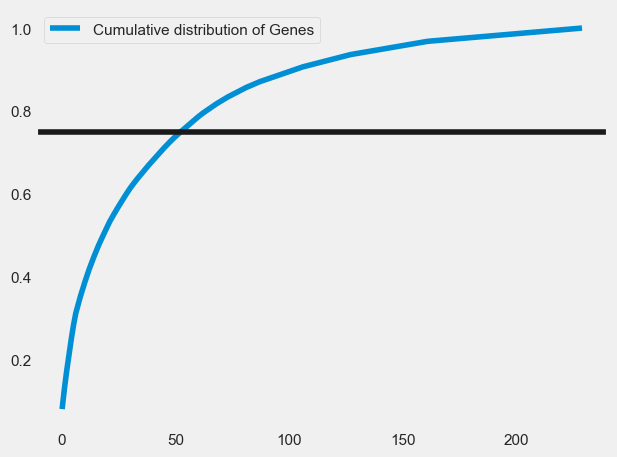

In [102]:
total_unique_values = sum(unique_gene.values);
percent_per_total = unique_gene.values/total_unique_values;
cumulative = np.cumsum(percent_per_total)
plt.plot(cumulative,label='Cumulative distribution of Genes',)

plt.grid()
plt.axhline(0.75, color='k')
plt.legend()
plt.tight_layout()
plt.show()

Looks like 75% of data consists of approximately 50 most common words.

In [103]:
# Vectorizing our 'Gene' feature
vectorizer = CountVectorizer()
train_gene_feature_onehotCoding =  vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding  =  vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding    =  vectorizer.transform(cv_df['Gene'])

In [104]:
# Evaluation Overlap
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

test_train_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_train_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
test_train_overlap = np.round(test_train_coverage*100/test_df.shape[0],1)
cv_train_overlap =  np.round(cv_train_coverage*100/cv_df.shape[0],1)

overlap= pd.DataFrame(data=[[test_train_overlap,cv_train_overlap]],columns=['Test-Train Data Overlap[%]','CV-Train Data Overlap[%]'])

# Evaluating Gene Feature
alpha = [10 ** x for x in range(-5, 1)]
# Tunning Hyper Parameter (Alpha)
tunning_df = eval_alpha_loss(alpha,train_gene_feature_onehotCoding,cv_gene_feature_onehotCoding)
# Selecting Best Alpha
best_alpha = tunning_df.loc[tunning_df['cv_log_loss'] == tunning_df['cv_log_loss'].min(), 'alpha'].item()

# Calculating Log_Loss for all test sets
gene_feat = eval_all_set('Gene',best_alpha,
                         train_gene_feature_onehotCoding,
                         cv_gene_feature_onehotCoding,
                         test_gene_feature_onehotCoding)

# Combining Report
gene_report=pd.concat([gene_feat,overlap],axis=1)
gene_report

Feature  best alpha  train_log_loss  cv_log_loss  test_log_loss  \
0    Gene      0.0001           0.988        1.175          1.216   

   Test-Train Data Overlap[%]  CV-Train Data Overlap[%]  
0                        96.7                      97.4

Great. Our log loss better off than our Random Model (~2.50). Looks like the lowest error is occured when Alpha = 0.0001

In [105]:
# How many unique values 
unique_variation = train_df['Variation'].value_counts()
print ('Number of unique Variation:',unique_variation.shape[0])

Number of unique Variation: 1925


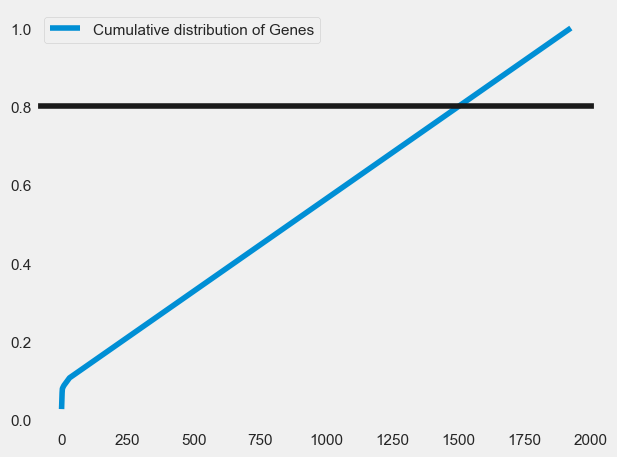

In [106]:
total_unique_values = sum(unique_variation.values);
percent_per_total = unique_variation.values/total_unique_values;
cumulative = np.cumsum(percent_per_total)
plt.plot(cumulative,label='Cumulative distribution of Genes',)

plt.grid()
plt.axhline(0.80, color='k')
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
vectorizer = CountVectorizer()

train_variation_feature_onehotCoding =  vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding  =  vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding    =  vectorizer.transform(cv_df['Variation'])

In [108]:
test_train_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_train_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
test_train_overlap = np.round(test_train_coverage*100/test_df.shape[0],1)
cv_train_overlap =  np.round(cv_train_coverage*100/cv_df.shape[0],1)

overlap= pd.DataFrame(data=[[test_train_overlap,cv_train_overlap]],columns=['Test-Train Data Overlap[%]','CV-Train Data Overlap[%]'])

# Evaluating Gene Feature
alpha = [10 ** x for x in range(-5, 1)]
# Tunning Hyper Parameter (Alpha)
tunning_df = eval_alpha_loss(alpha,train_gene_feature_onehotCoding,cv_gene_feature_onehotCoding)
# Selecting Best Alpha
best_alpha = tunning_df.loc[tunning_df['cv_log_loss'] == tunning_df['cv_log_loss'].min(), 'alpha'].item()

# Calculating Log_Loss for all test sets
feat_rep = eval_all_set('Variation',best_alpha,
                         train_variation_feature_onehotCoding,
                         cv_variation_feature_onehotCoding,
                         test_variation_feature_onehotCoding)

# Combining Report
variation_report=pd.concat([feat_rep,overlap],axis=1)
variation_report

Feature  best alpha  train_log_loss  cv_log_loss  test_log_loss  \
0  Variation      0.0001           0.681        1.727          1.687   

   Test-Train Data Overlap[%]  CV-Train Data Overlap[%]  
0                        11.7                       8.5

CV and Test log loss is much higher in comparison with train. Most likely the coverage of variation data is low. 

In [109]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])

# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52744


/Users/manasak/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
# Normalizing One_Hot_Encoding
from sklearn.preprocessing import normalize

# we use the same vectorizer that was trained on train data
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [111]:
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
# .A1 turns(compresses) Matrix into Array
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# We will use it to check overlaps between data sets
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

# Sorting dictionary based on the value ( not key ) 
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

len1,len2 = get_intersec_text(test_df)
test_train_overlap =np.round((len2/len1)*100, 1)
len1,len2 = get_intersec_text(cv_df)
cv_train_overlap = np.round((len2/len1)*100, 1)

In [112]:
overlap= pd.DataFrame(data=[[test_train_overlap, cv_train_overlap]],columns=['Test-Train Data Overlap[%]','CV-Train Data Overlap[%]'])

# Evaluating Gene Feature
alpha = [10 ** x for x in range(-5, 1)]
# Tunning Hyper Parameter (Alpha)
tunning_df = eval_alpha_loss(alpha,train_gene_feature_onehotCoding,cv_gene_feature_onehotCoding)
# Selecting Best Alpha
best_alpha = tunning_df.loc[tunning_df['cv_log_loss'] == tunning_df['cv_log_loss'].min(), 'alpha'].item()

# Calculating Log_Loss for all test sets
feat_rep = eval_all_set('TEXT',best_alpha,
                         train_text_feature_onehotCoding,
                         cv_text_feature_onehotCoding,
                         test_text_feature_onehotCoding)

# Combining Report
text_report=pd.concat([feat_rep,overlap],axis=1)

In [113]:
all_features = pd.concat([gene_report,variation_report,text_report],axis=0)
all_features

Feature  best alpha  train_log_loss  cv_log_loss  test_log_loss  \
0       Gene      0.0001           0.988        1.175          1.216   
0  Variation      0.0001           0.681        1.727          1.687   
0       TEXT      0.0001           0.691        1.110          1.111   

   Test-Train Data Overlap[%]  CV-Train Data Overlap[%]  
0                        96.7                      97.4  
0                        11.7                       8.5  
0                        96.5                      99.2

Seems like Variation column can be an issues, since the there is a small overalap between data sets

In [114]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)




def eval_alpha_model_loss(alpha,train_feat_hotencode,cv_feat_hotencode):
    """
    IN: Hyperparameter Alpha, Train_Feature_onehotencoded, CV_Feature_onehotencoded
    OUT: Hyperparameter Tunning DataFrame 
    """
    cv_log_error_array=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
        clf.fit(train_feat_hotencode, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_feat_hotencode, y_train)
        predict_y = sig_clf.predict_proba(cv_feat_hotencode)
    
        cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

    temp_df = pd.DataFrame(data={'alpha': np.round(alpha,5), 
                                 'cv_log_loss': np.round(cv_log_error_array,5)})
    return temp_df

In [115]:
def plot_matrices(y_test,predicted_y):  

    confusion = confusion_matrix(y_test, predicted_y)
    precision =(confusion/confusion.sum(axis=0))
    recall =(((confusion.T)/(confusion.sum(axis=1))).T)
    
    f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
                gridspec_kw={'width_ratios':[1,1,1,0.08]},figsize=(22,6))
    
    labels = [1,2,3,4,5,6,7,8,9]
    
    g1 = sns.heatmap(confusion,cbar=False,ax=ax1,annot=True, cmap="Blues", fmt=".3f", xticklabels=labels, yticklabels=labels,)
    g1.set_ylabel('Class')
    g1.set_xlabel('Class')
    g1.set_title('Confusion')
    g2 = sns.heatmap(precision,cmap="Blues",cbar=False,ax=ax2, annot=True,fmt=".3f", xticklabels=labels, yticklabels=labels)
    g2.set_ylabel('Class')
    g2.set_xlabel('Class')
    g2.set_yticks(labels)
    g2.set_title('Precision')
    g3 = sns.heatmap(recall,cmap="Blues",ax=ax3, cbar_ax=axcb, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    g3.set_ylabel('Class')
    g3.set_xlabel('Class')
    g3.set_title('Recall')
    g3.set_yticks(labels)
    
    for ax in [g1,g2,g3]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(tl, rotation=0)
        tly = ax.get_yticklabels()
        ax.set_yticklabels(tly, rotation=0)  
    plt.show()   

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    # calculating the number of data points that are misclassified
    plot_matrices(test_y, pred_y)    

def model_performance(name,clf,best_alpha,
                 train_X_hotencode,
                 cv_X_hotencode,
                 test_X_hotencode):
    '''
    IN: Model name, Classifier, Best Alpha, and All 3 OneHotEncoded Sets 
    OUT: Log-Loss Report data frame
    '''
    # Model
    clf = clf
    clf.fit(train_X_hotencode, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_X_hotencode, train_y)
    
    train_predict_y = sig_clf.predict_proba(train_X_hotencode)
    train_log_loss = np.round(log_loss(y_train, train_predict_y, labels=clf.classes_, eps=1e-15),3)

    cv_predict_y = sig_clf.predict_proba(cv_X_hotencode)
    cv_log_loss = np.round(log_loss(y_cv, cv_predict_y, labels=clf.classes_, eps=1e-15),3)
    
    test_predict_y = sig_clf.predict_proba(test_X_hotencode)
    test_log_loss = np.round(log_loss(y_test, test_predict_y, labels=clf.classes_, eps=1e-15),3)
    
    pred_y = sig_clf.predict(test_X_hotencode)
    
    miss_class = np.count_nonzero((pred_y- test_y))/test_y.shape[0]
    
    
    report_log_loss=[name,
                     best_alpha,
                     train_log_loss,
                     cv_log_loss,
                     test_log_loss,
                     miss_class]
    
    temp_df = pd.DataFrame([report_log_loss],columns=['Model','best alpha','train_log_loss','cv_log_loss','test_log_loss','Miss_classified(%)' ])   
    return temp_df

In [116]:
from scipy.sparse import hstack

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [117]:
from sklearn.naive_bayes import MultinomialNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    #print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    
    
temp_df = pd.DataFrame(data={'alpha': np.round(alpha,5), 'cv_log_error': np.round(cv_log_error_array,5)})
temp_df.sort_values(by ='cv_log_error',ascending=True)

alpha  cv_log_error
3     0.10000       1.26395
2     0.00100       1.27006
0     0.00001       1.27301
4     1.00000       1.27606
1     0.00010       1.27641
7  1000.00000       1.37198
6   100.00000       1.42069
5    10.00000       1.42158

In [118]:
best_alpha = temp_df.loc[temp_df['cv_log_error'] == temp_df['cv_log_error'].min(), 'alpha'].item()

# Model 
clf = MultinomialNB(alpha=best_alpha)

# Calculating Log_Loss for all test sets
NB_report = model_performance('Naive Bayes',
                             clf,
                             best_alpha,
                         train_x_onehotCoding,
                         cv_x_onehotCoding,
                         test_x_onehotCoding)
NB_report

Model  best alpha  train_log_loss  cv_log_loss  test_log_loss  \
0  Naive Bayes         0.1           0.875        1.264          1.239   

   Miss_classified(%)  
0             0.39006

Naive Bayes


/var/folders/3z/0y2_w0b11r7d0tynjxbry4zh0000gn/T/ipykernel_1374/2713463951.py:4: RuntimeWarning: invalid value encountered in true_divide
  precision =(confusion/confusion.sum(axis=0))


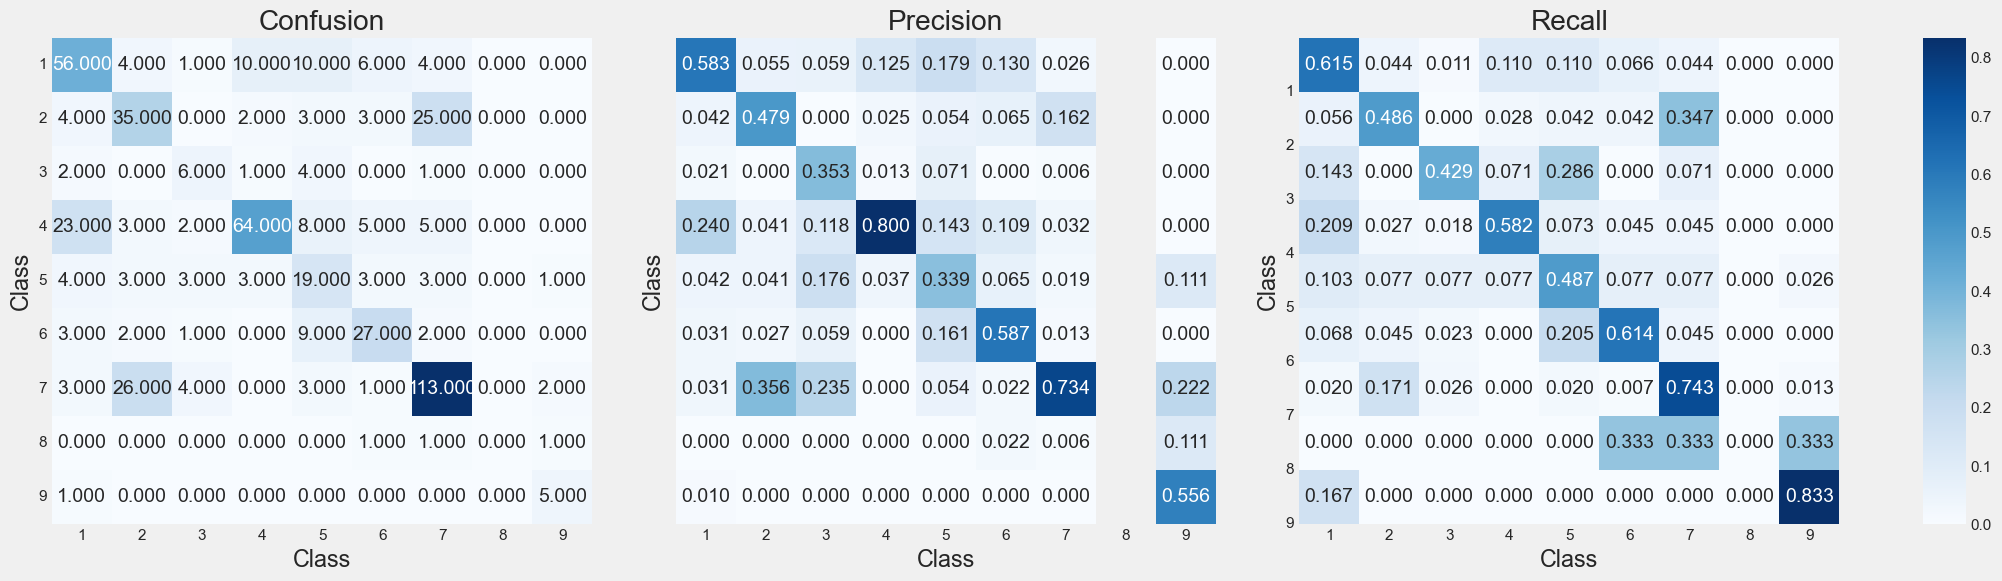

In [119]:
print ('Naive Bayes')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [120]:
# Use the classifier to make predictions on the testing data
y_pred_multinomial_nb = clf.predict(test_x_onehotCoding)

In [121]:
# Get the accuracy score and confusion matrix
accuracy_multinomial_nb = accuracy_score(test_y, y_pred_multinomial_nb)
cm_multinomial_nb = confusion_matrix(test_y, y_pred_multinomial_nb)

In [122]:
class_names=df['Class'].unique()

In [123]:
# Print the accuracy and confusion matrix
print("Accuracy:", accuracy_multinomial_nb)

Accuracy: 0.6159638554216867


In [124]:
print("Confusion Matrix:\n", cm_multinomial_nb)

Confusion Matrix:
 [[ 80   3   2   8  14   2   3   0   1]
 [  3  49   0   0   2   1  34   2   0]
 [  1   1   9   1   2   0   4   0   0]
 [ 37   3   6  72  12   2   5   0   0]
 [  9   3   2   2  22   3   7   0   0]
 [  5   2   1   2   3  39   3   0   0]
 [  3  40  10   0   3   3 131   0   1]
 [  0   0   0   0   0   0   0   1   3]
 [  1   0   0   0   0   0   0   0   6]]


Text(0.5, 1.0, 'Confusion Matrix')

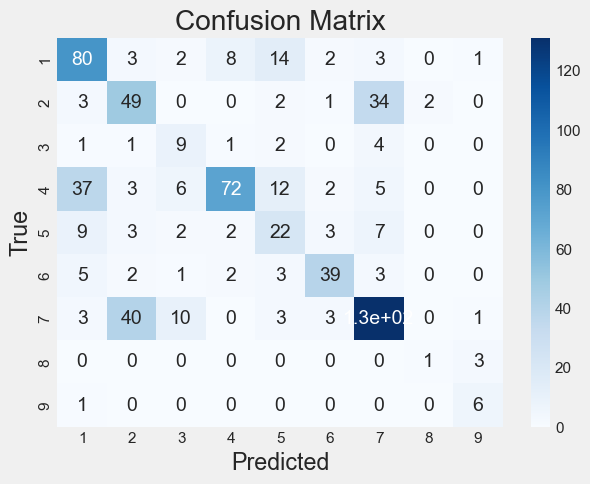

In [125]:
sns.heatmap(cm_multinomial_nb, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

Decision Tree:

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [127]:
MyDT.fit(train_x_onehotCoding, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [128]:
feature_names=all_features.Feature

In [129]:
feature_names

0         Gene
0    Variation
0         TEXT
Name: Feature, dtype: object

[Text(0.5, 0.875, 'X[30249] <= 0.004\nentropy = 2.642\nsamples = 2121\nvalue = [362, 289, 57, 439, 155, 174, 609, 12, 24]'),
 Text(0.25, 0.625, 'X[12411] <= 0.01\nentropy = 2.623\nsamples = 1135\nvalue = [301, 95, 27, 336, 113, 120, 113, 9, 21]'),
 Text(0.125, 0.375, 'X[8299] <= 0.003\nentropy = 2.465\nsamples = 890\nvalue = [255, 95, 16, 302, 44, 35, 113, 9, 21]'),
 Text(0.0625, 0.125, 'entropy = 2.337\nsamples = 689\nvalue = [214, 53, 16, 272, 36, 29, 44, 7, 18]'),
 Text(0.1875, 0.125, 'entropy = 2.372\nsamples = 201\nvalue = [41, 42, 0, 30, 8, 6, 69, 2, 3]'),
 Text(0.375, 0.375, 'X[44273] <= 0.009\nentropy = 2.094\nsamples = 245\nvalue = [46, 0, 11, 34, 69, 85, 0, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.386\nsamples = 79\nvalue = [4, 0, 0, 0, 1, 74, 0, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 2.017\nsamples = 166\nvalue = [42, 0, 11, 34, 68, 11, 0, 0, 0]'),
 Text(0.75, 0.625, 'X[36594] <= 0.003\nentropy = 2.177\nsamples = 986\nvalue = [61, 194, 30, 103, 42, 54, 496, 3, 3]'),
 Tex

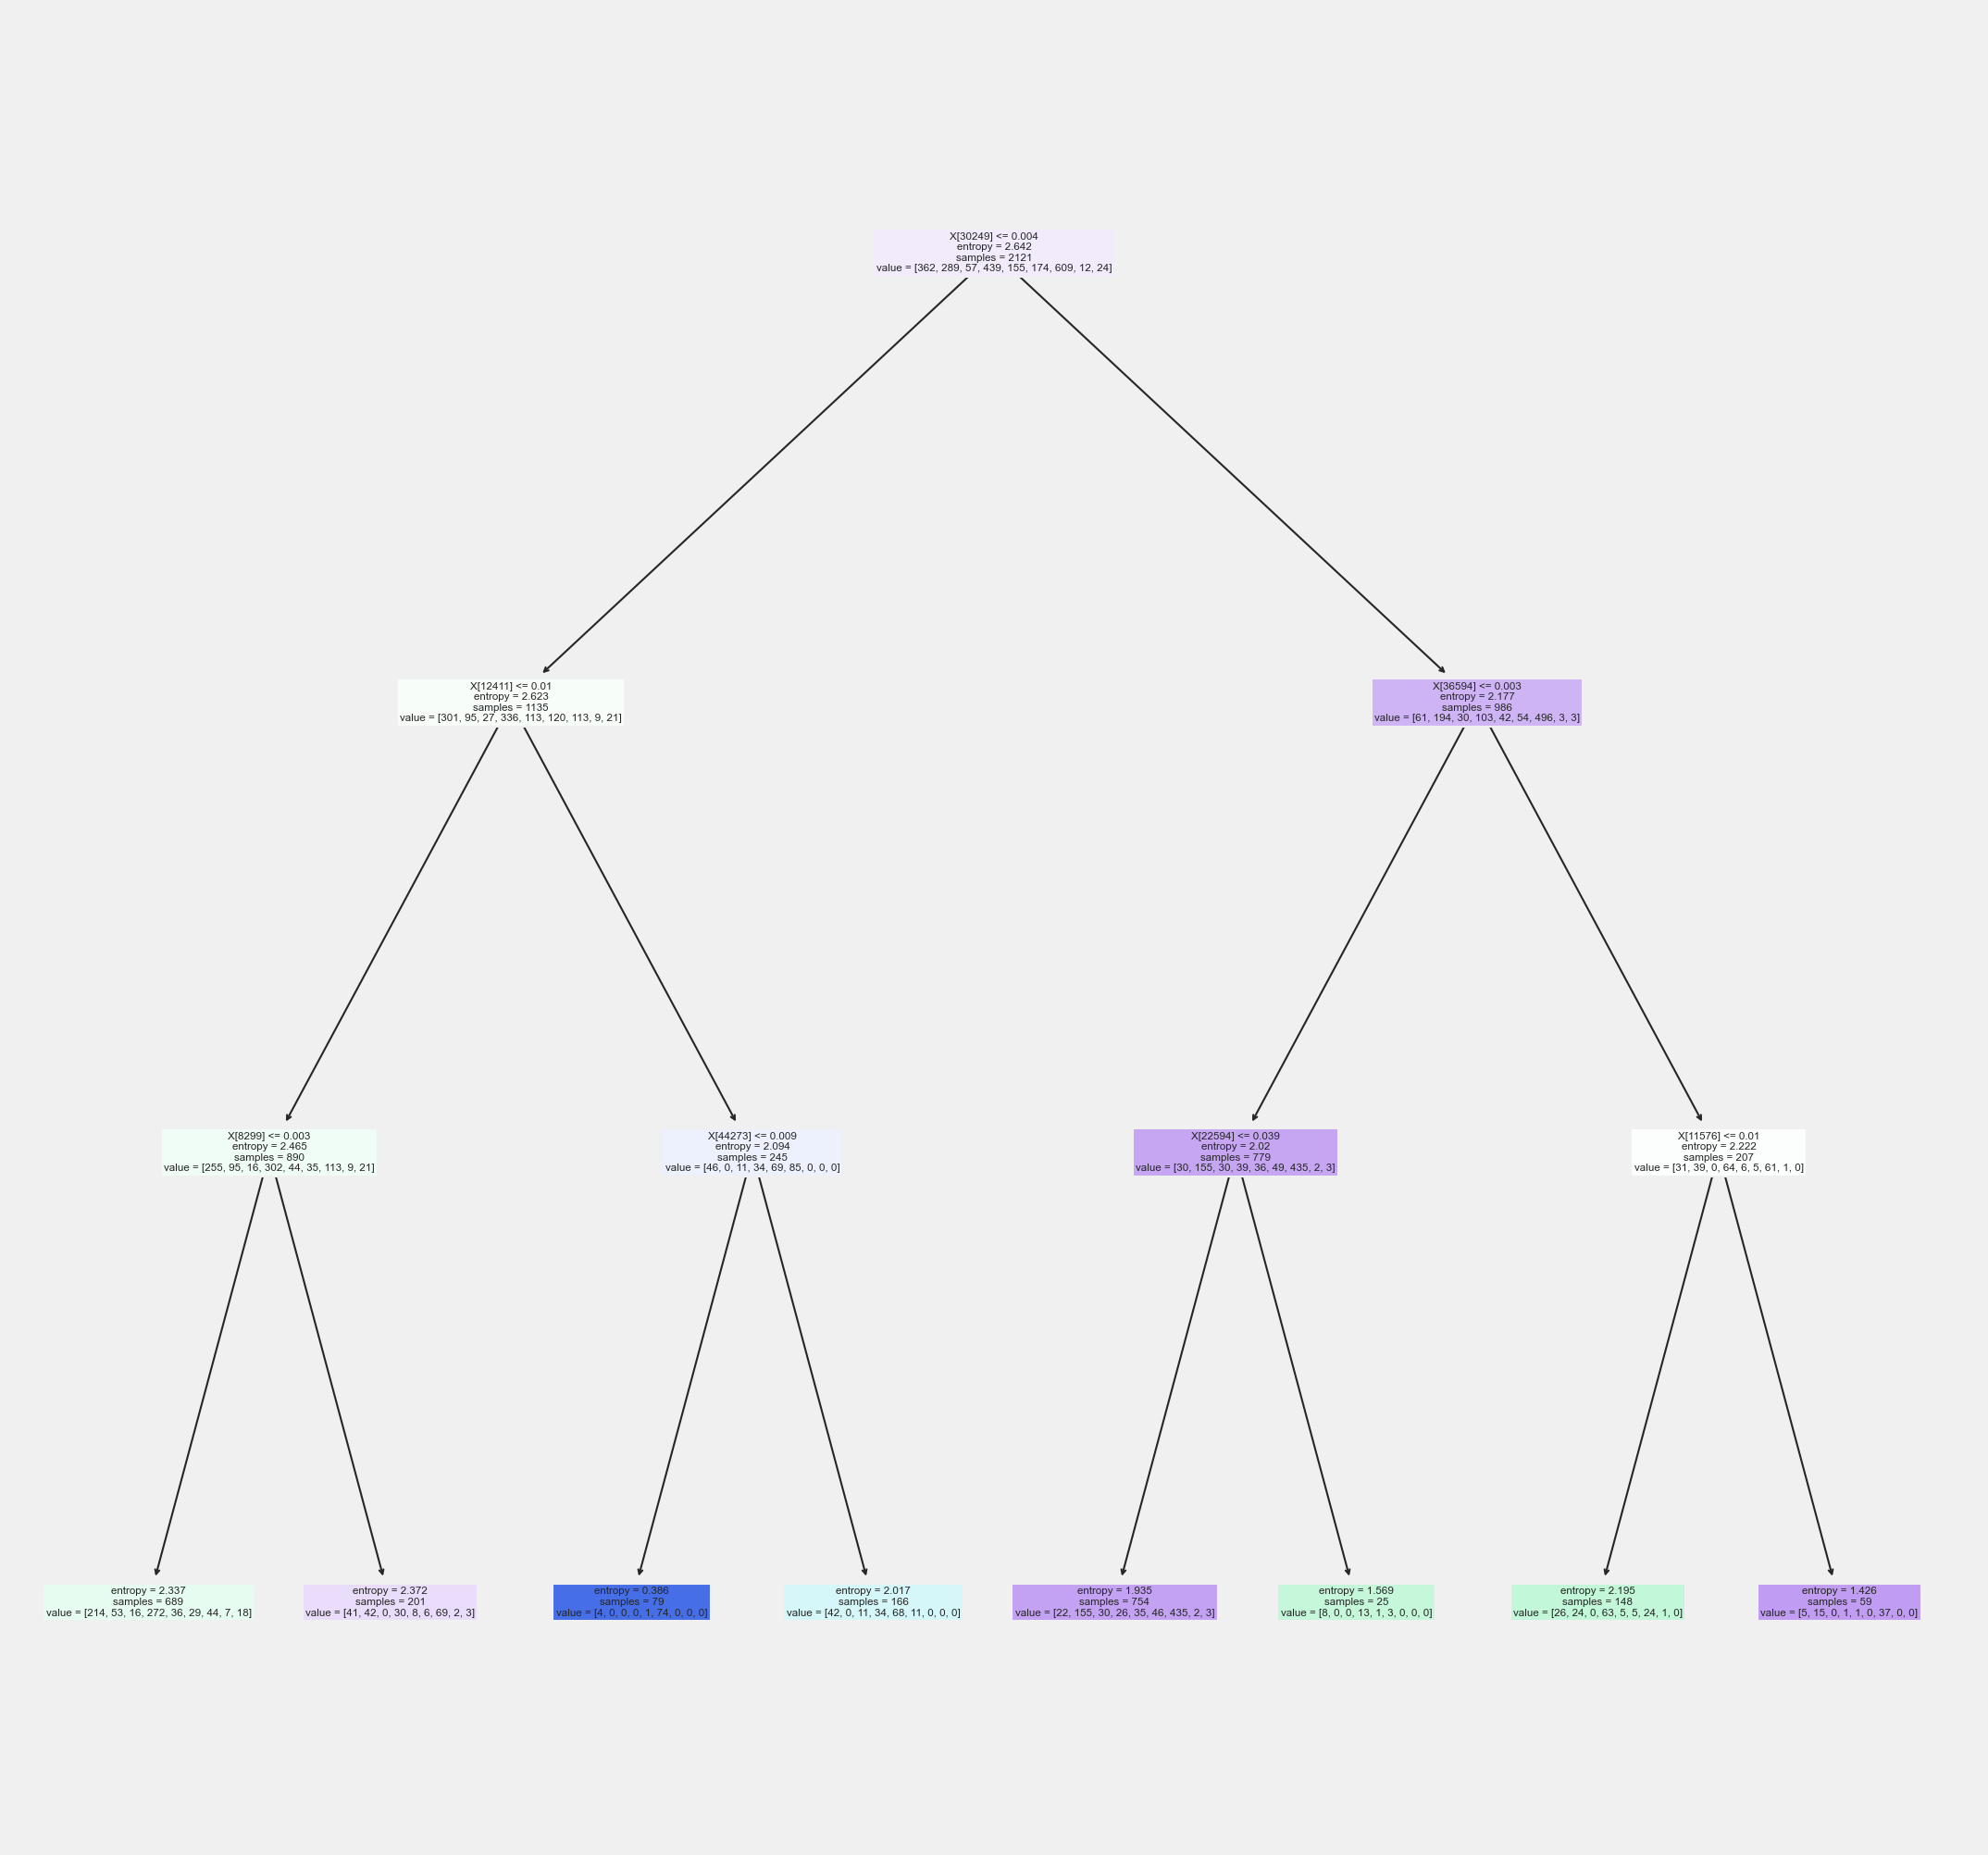

In [130]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi=300)
plot_tree(MyDT, filled=True  ,  impurity=True, ax=axes)

In [131]:
# Use the classifier to make predictions on the testing data
y_pred = MyDT.predict(test_x_onehotCoding)

# Get the confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print(cm)

[[  0   0   0  63  15   2  33   0   0]
 [  0   0   0  13   0   0  78   0   0]
 [  0   0   0   2   3   0  13   0   0]
 [  0   0   0  79  10   0  48   0   0]
 [  0   0   0  12  22   0  14   0   0]
 [  0   0   0   9  15  13  18   0   0]
 [  0   0   0  21   0   0 170   0   0]
 [  0   0   0   3   0   0   1   0   0]
 [  0   0   0   7   0   0   0   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

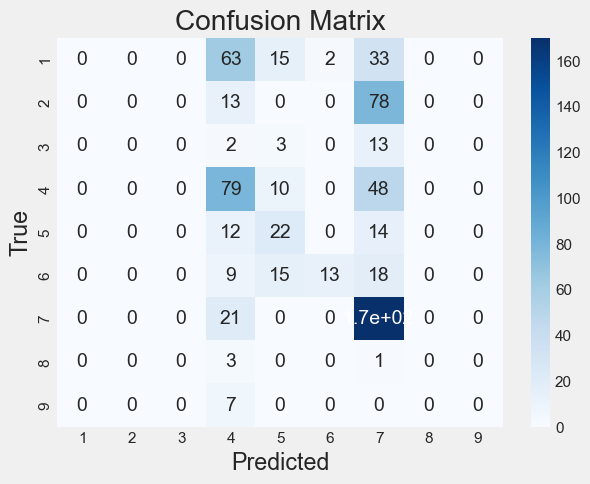

In [132]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [133]:
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.42771084337349397


In [134]:
MyDT_Gini=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [135]:
MyDT_Gini.fit(train_x_onehotCoding, train_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[30249] <= 0.004\ngini = 0.814\nsamples = 2121\nvalue = [362, 289, 57, 439, 155, 174, 609, 12, 24]'),
 Text(0.25, 0.625, 'X[36107] <= 0.033\ngini = 0.803\nsamples = 1135\nvalue = [301, 95, 27, 336, 113, 120, 113, 9, 21]'),
 Text(0.125, 0.375, 'X[39642] <= 0.015\ngini = 0.789\nsamples = 1056\nvalue = [294, 95, 27, 335, 99, 63, 113, 9, 21]'),
 Text(0.0625, 0.125, 'gini = 0.798\nsamples = 996\nvalue = [294, 95, 24, 279, 99, 63, 112, 9, 21]'),
 Text(0.1875, 0.125, 'gini = 0.126\nsamples = 60\nvalue = [0, 0, 3, 56, 0, 0, 1, 0, 0]'),
 Text(0.375, 0.375, 'X[44273] <= 0.009\ngini = 0.44\nsamples = 79\nvalue = [7, 0, 0, 1, 14, 57, 0, 0, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 57\nvalue = [0, 0, 0, 0, 0, 57, 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.492\nsamples = 22\nvalue = [7, 0, 0, 1, 14, 0, 0, 0, 0]'),
 Text(0.75, 0.625, 'X[36594] <= 0.01\ngini = 0.688\nsamples = 986\nvalue = [61, 194, 30, 103, 42, 54, 496, 3, 3]'),
 Text(0.625, 0.375, 'X[39591] <= 0.013\ngini

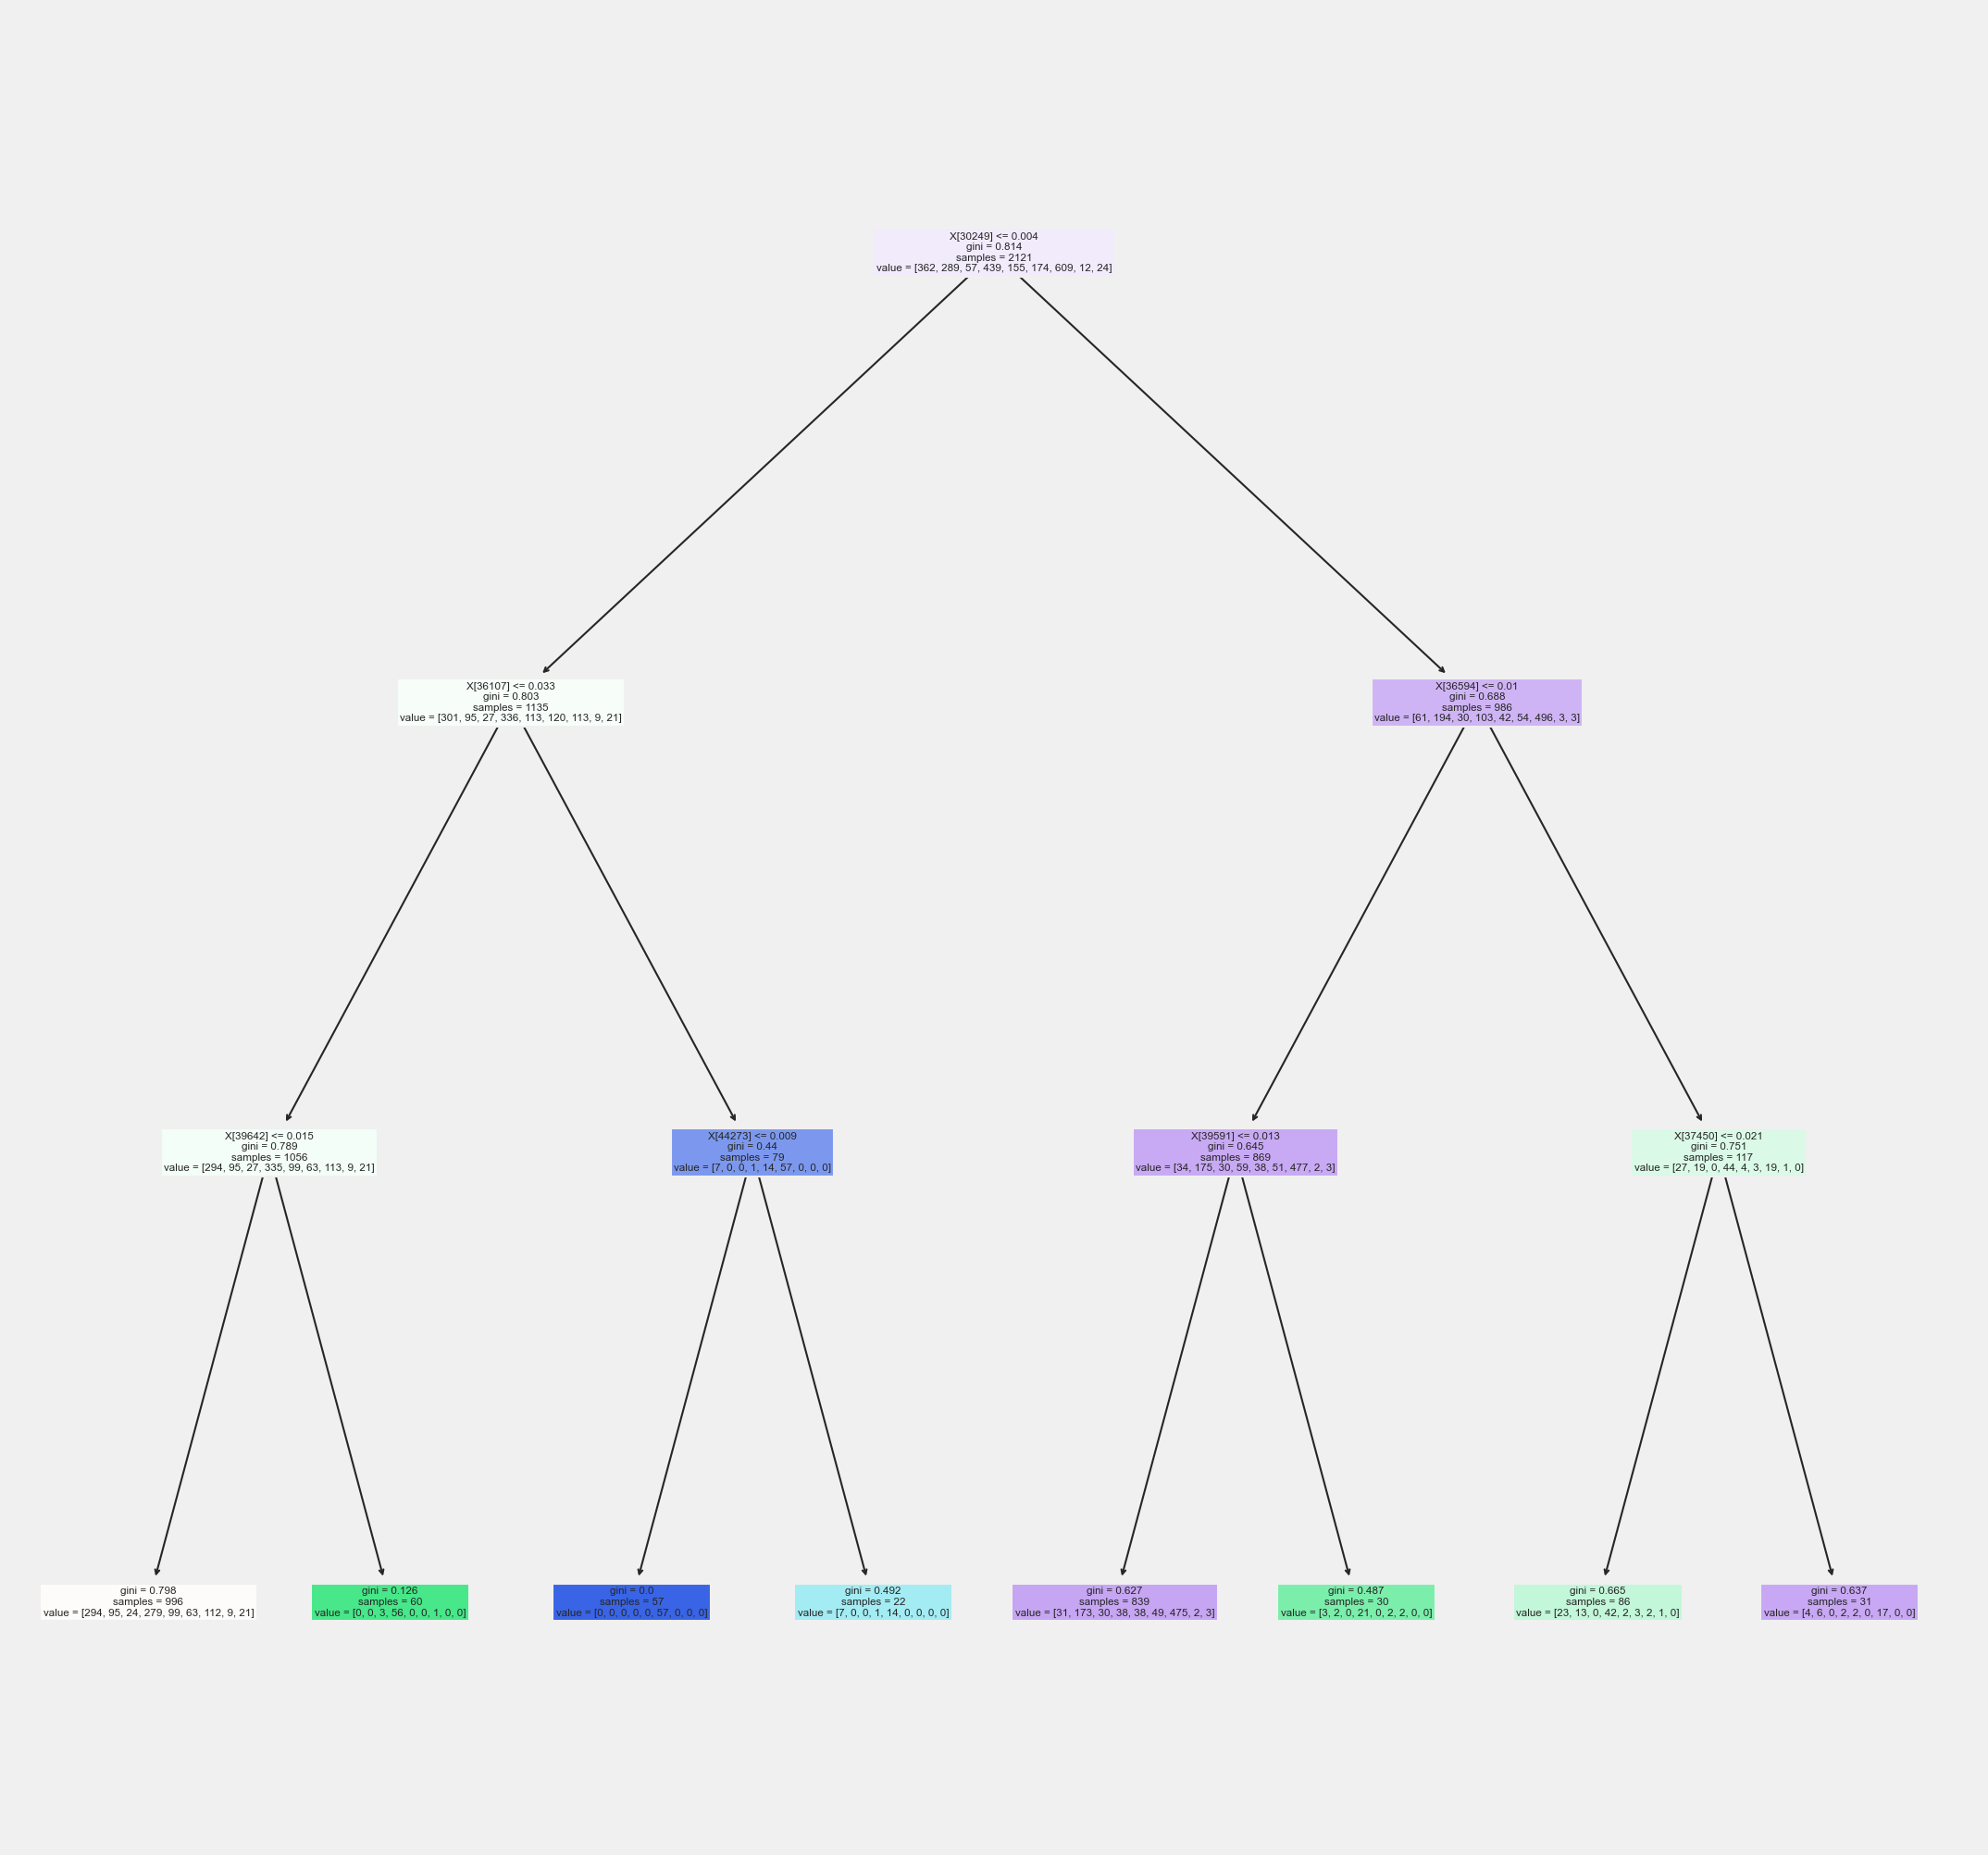

In [136]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi=300)
plot_tree(MyDT_Gini, filled=True  ,  impurity=True, ax=axes)

In [137]:
# Use the classifier to make predictions on the testing data
y_pred = MyDT_Gini.predict(test_x_onehotCoding)

# Get the confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print(cm)

[[ 80   0   0  15   2   0  16   0   0]
 [ 24   0   0  12   0   0  55   0   0]
 [  6   0   0   1   0   0  11   0   0]
 [ 62   0   0  50   1   0  24   0   0]
 [ 30   0   0   3   6   0   9   0   0]
 [ 24   0   0   4  13   3  11   0   0]
 [ 25   0   0  36   0   0 130   0   0]
 [  3   0   0   0   0   0   1   0   0]
 [  7   0   0   0   0   0   0   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

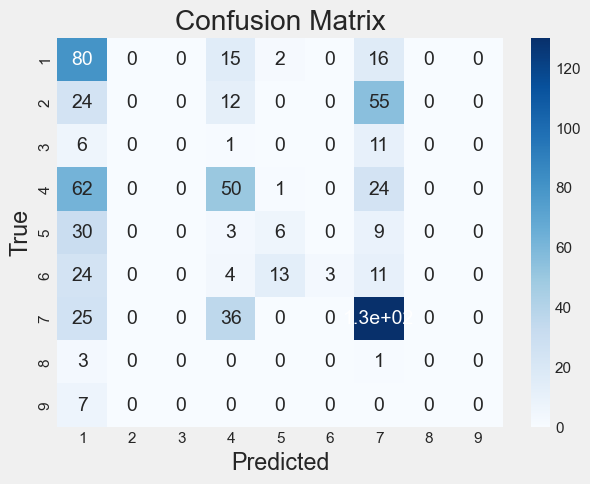

In [138]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [139]:
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.40512048192771083


In [140]:
MyDT_depth=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=5, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,  
                            class_weight=None)

In [141]:
MyDT_depth.fit(train_x_onehotCoding, train_y)

DecisionTreeClassifier(max_depth=5)

[Text(0.4453125, 0.9166666666666666, 'X[30249] <= 0.004\ngini = 0.814\nsamples = 2121\nvalue = [362, 289, 57, 439, 155, 174, 609, 12, 24]'),
 Text(0.22395833333333334, 0.75, 'X[36107] <= 0.033\ngini = 0.803\nsamples = 1135\nvalue = [301, 95, 27, 336, 113, 120, 113, 9, 21]'),
 Text(0.15625, 0.5833333333333334, 'X[39642] <= 0.015\ngini = 0.789\nsamples = 1056\nvalue = [294, 95, 27, 335, 99, 63, 113, 9, 21]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[1928] <= 0.5\ngini = 0.798\nsamples = 996\nvalue = [294, 95, 24, 279, 99, 63, 112, 9, 21]'),
 Text(0.041666666666666664, 0.25, 'X[8299] <= 0.003\ngini = 0.804\nsamples = 954\nvalue = [254, 94, 24, 279, 99, 62, 112, 9, 21]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.781\nsamples = 747\nvalue = [211, 52, 23, 247, 88, 57, 44, 7, 18]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.78\nsamples = 207\nvalue = [43, 42, 1, 32, 11, 5, 68, 2, 3]'),
 Text(0.125, 0.25, 'X[19036] <= 0.076\ngini = 0.092\nsamples = 42\nvalue = [40

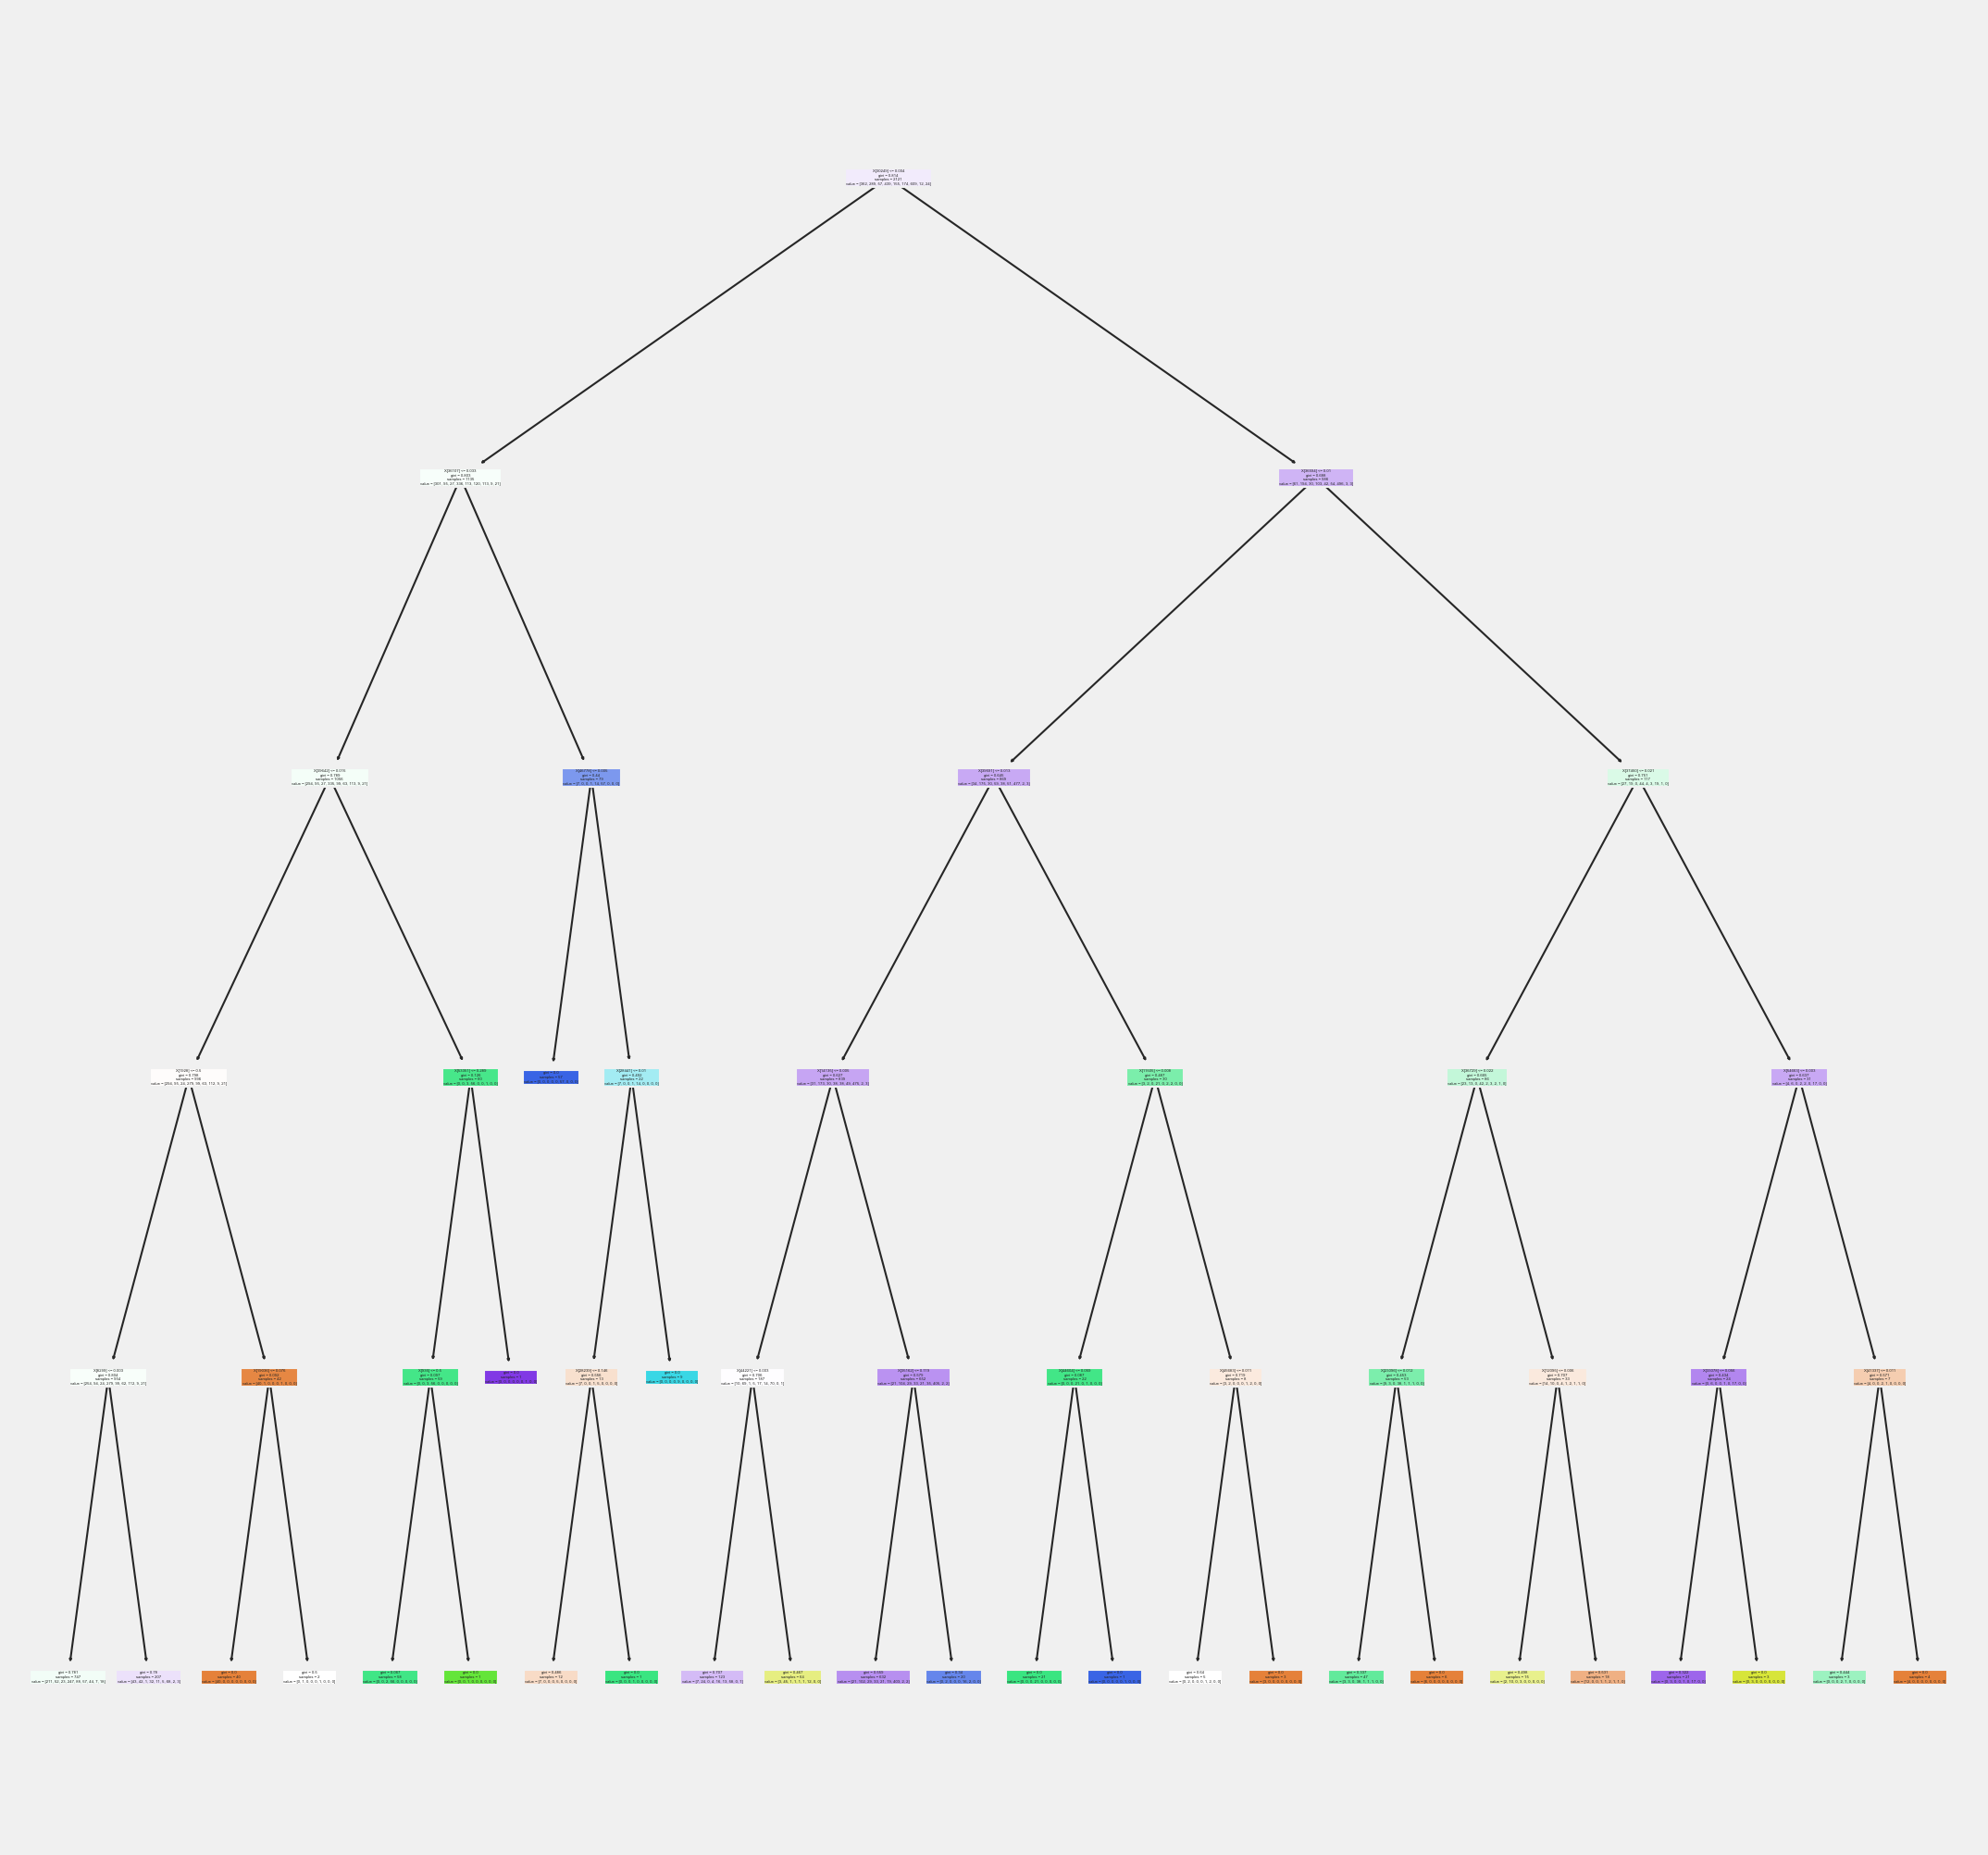

In [142]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi=300)
plot_tree(MyDT_depth, filled=True  ,  impurity=True, ax=axes)

In [143]:
# Use the classifier to make predictions on the testing data
y_pred = MyDT_depth.predict(test_x_onehotCoding)

# Get the confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print(cm)

[[ 25   4   0  51   1   0  32   0   0]
 [  4  16   0  11   0   2  58   0   0]
 [  0   0   0   5   0   0  13   0   0]
 [  7   4   0  84   0   0  42   0   0]
 [  3   4   0  23   1   0  17   0   0]
 [  2   2   0  18   3  19  11   0   0]
 [ 15  19   0  22   0   4 131   0   0]
 [  0   0   0   3   0   0   1   0   0]
 [  0   0   0   7   0   0   0   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

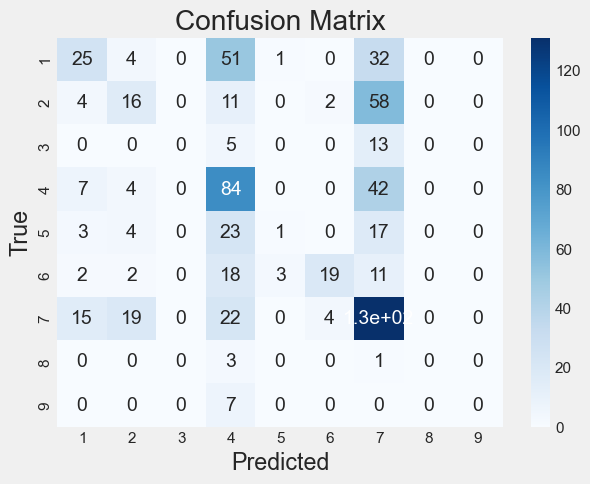

In [144]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [145]:
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.41566265060240964


## SVM

In [240]:
from sklearn import svm
from sklearn.svm import SVC

svm_1 = SVC(kernel = 'rbf',C=0.1)

svm_1.fit(train_x_onehotCoding, train_y)

svm_1_pred = svm_1.predict(test_x_onehotCoding)

cm_svm_1 = confusion_matrix(test_y, svm_1_pred)

# Print the confusion matrix
print(cm_svm_1)

[[  0   0   0   2   0   0 111   0   0]
 [  0   0   0   0   0   0  91   0   0]
 [  0   0   0   1   0   0  17   0   0]
 [  0   0   0  19   0   0 118   0   0]
 [  0   0   0   6   0   0  42   0   0]
 [  0   0   0   0   0  13  42   0   0]
 [  0   0   0   0   0   0 191   0   0]
 [  0   0   0   0   0   0   4   0   0]
 [  0   0   0   0   0   0   7   0   0]]


In [241]:
accuracy = accuracy_score(test_y, svm_1_pred)
print(accuracy)

0.3358433734939759


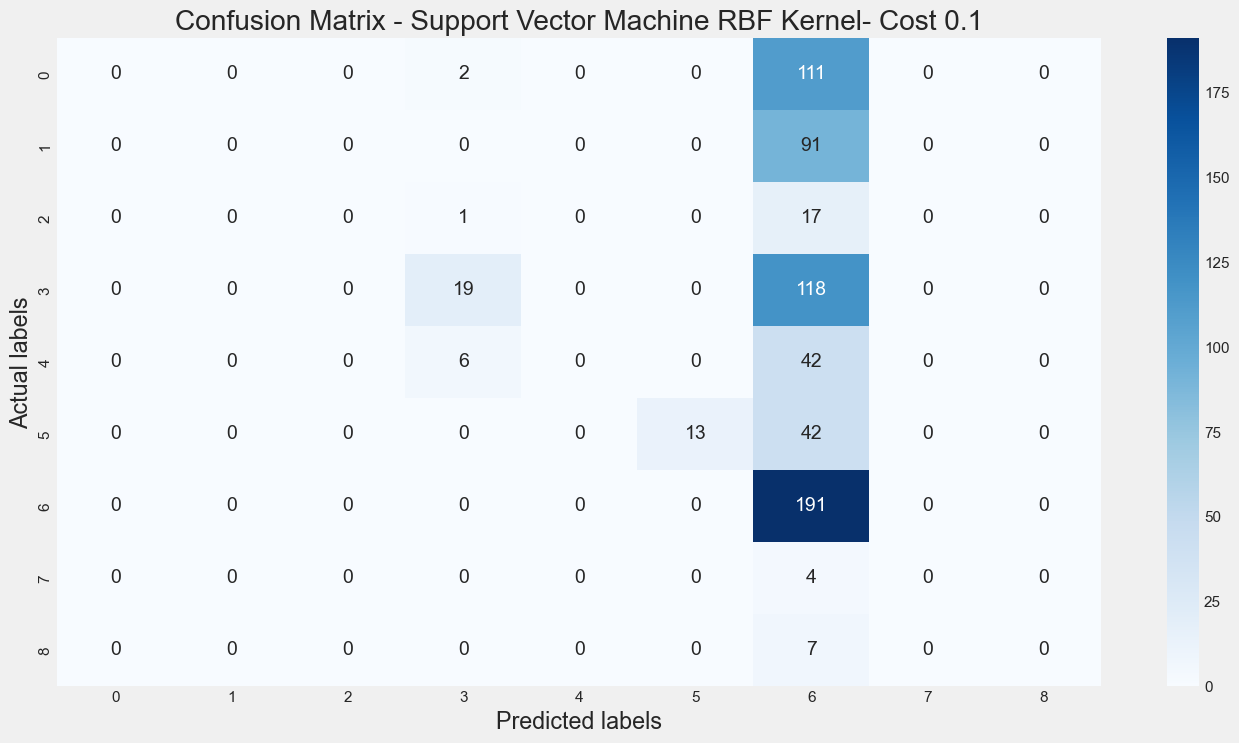

In [244]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_1, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine RBF Kernel- Cost 0.1")
plt.show()

#### SVM with RBF Kernel

In [243]:
svm_rbf = SVC(kernel = 'rbf', C = 1)
svm_rbf.fit(train_x_onehotCoding, train_y)
svm_rbf_pred = svm_rbf.predict(test_x_onehotCoding)

cm_svm_rbf = confusion_matrix(test_y, svm_rbf_pred)

# Print the confusion matrix
print(cm_svm_rbf)

[[ 46   0   1   6   4   0  56   0   0]
 [  2  18   0   0   0   1  70   0   0]
 [  0   0   2   3   1   0  12   0   0]
 [ 11   0   0  67   3   0  56   0   0]
 [ 20   0   0   5   8   2  13   0   0]
 [  7   1   1   1   1  32  12   0   0]
 [  0   2   0   0   0   0 189   0   0]
 [  0   0   0   0   0   0   4   0   0]
 [  0   0   0   0   0   0   7   0   0]]


In [245]:
accuracy_rbf = accuracy_score(test_y, svm_rbf_pred)
print(accuracy_rbf)

0.5451807228915663


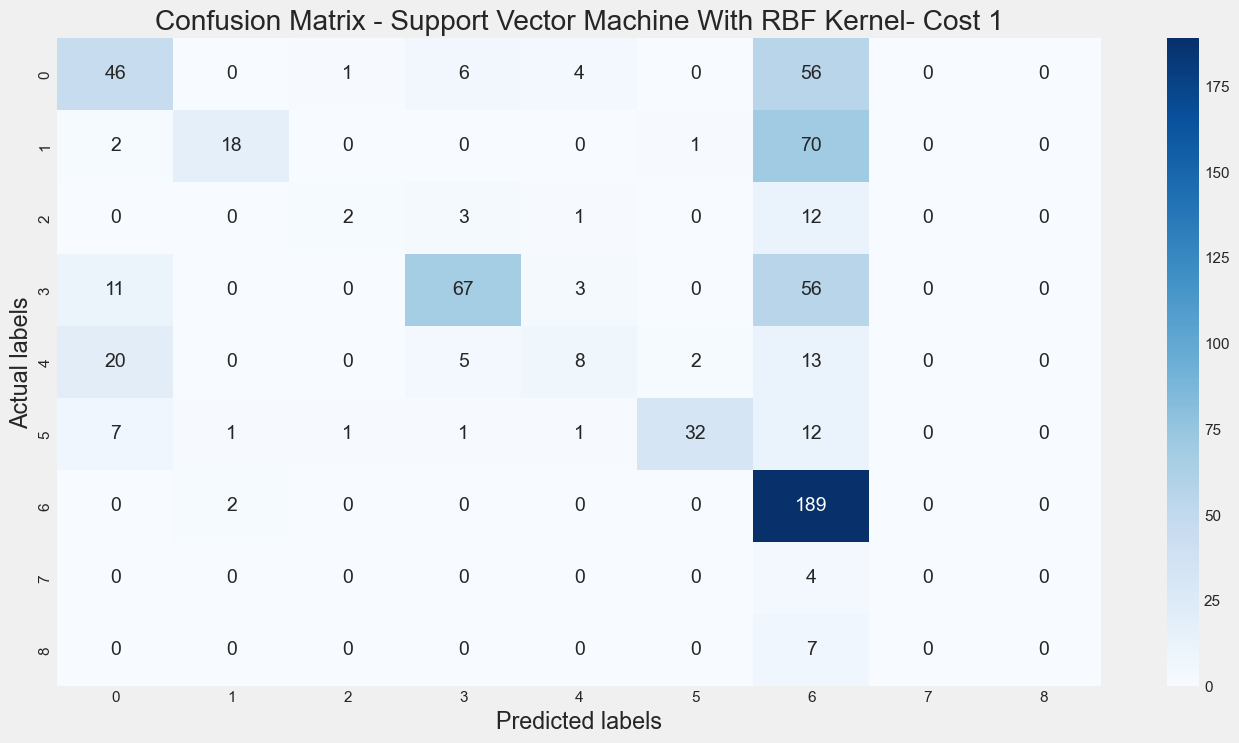

In [246]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_rbf, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With RBF Kernel- Cost 1")
plt.show()

#### Updating the Cost value

In [247]:
svm_rbf_c_1 = SVC(kernel = 'rbf', C = 10)
svm_rbf_c_1.fit(train_x_onehotCoding, train_y)
svm_rbf_c_pred_1 = svm_rbf_c_1.predict(test_x_onehotCoding)

cm_svm_rbf_c_1 = confusion_matrix(test_y, svm_rbf_c_pred_1)

# Print the confusion matrix
print(cm_svm_rbf_c_1)

[[ 50   0   1   6   5   1  50   0   0]
 [  4  32   0   0   0   1  54   0   0]
 [  0   0   2   3   2   0  11   0   0]
 [ 10   0   2  72   0   1  52   0   0]
 [ 18   0   0   7  11   1  11   0   0]
 [  3   1   1   0   1  39  10   0   0]
 [  0   7   0   1   4   4 175   0   0]
 [  0   0   0   0   0   0   4   0   0]
 [  1   0   0   0   0   0   4   0   2]]


In [248]:
accuracy_rbf_c_1 = accuracy_score(test_y, svm_rbf_c_pred_1)
print(accuracy_rbf_c_1)

0.5768072289156626


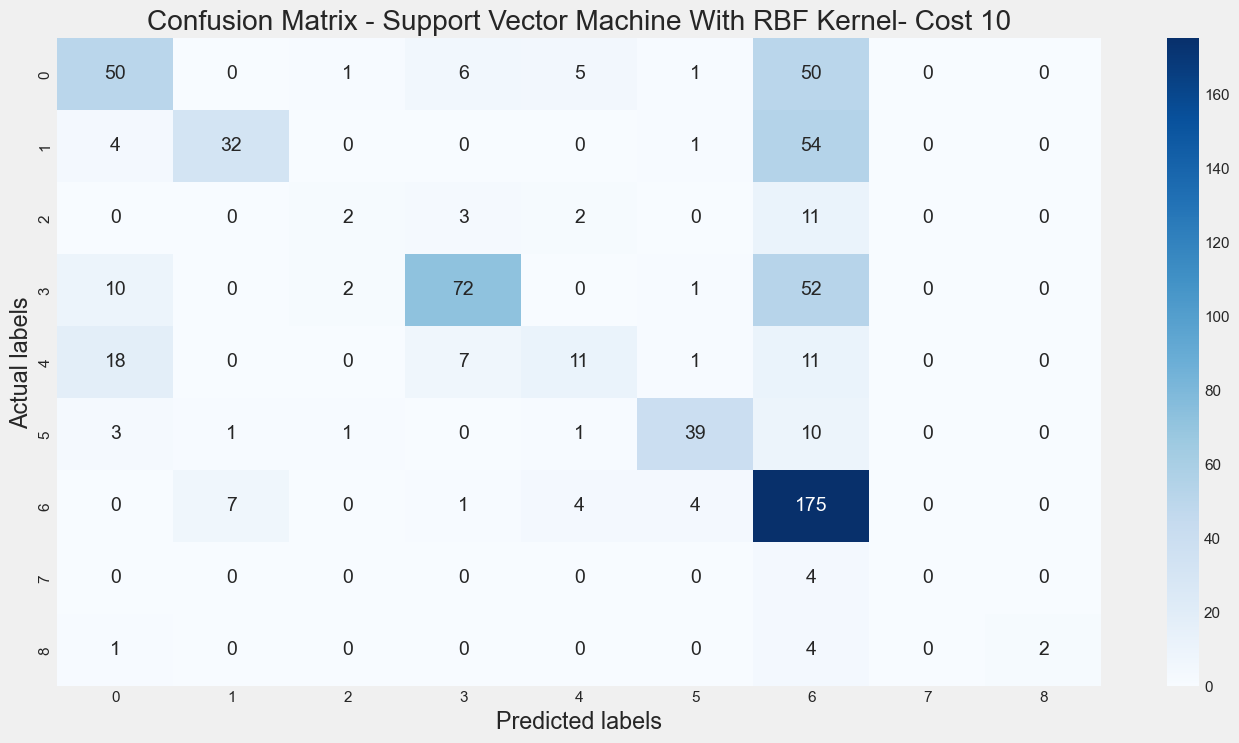

In [249]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_rbf_c_1, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With RBF Kernel- Cost 10")
plt.show()

#### SVM with Ploynomial Kernel

In [250]:
svm_poly = SVC(kernel= 'poly', C = 0.1)
svm_poly.fit(train_x_onehotCoding, train_y)
svm_poly_pred = svm_poly.predict(test_x_onehotCoding)

cm_svm_poly = confusion_matrix(test_y, svm_poly_pred)

# Print the confusion matrix
print(cm_svm_poly)

accuracy_poly = accuracy_score(test_y, svm_poly_pred)
print(accuracy_poly)

[[ 13   0   0   4   0   0  96   0   0]
 [  1   9   0   0   0   0  81   0   0]
 [  0   0   0   0   0   0  18   0   0]
 [  6   0   0  20   0   0 111   0   0]
 [  4   0   0   3   0   0  41   0   0]
 [  2   0   0   1   0   5  47   0   0]
 [  0   8   0   0   1   0 182   0   0]
 [  0   0   0   0   0   0   2   1   1]
 [  0   0   0   0   0   0   5   0   2]]
0.3493975903614458


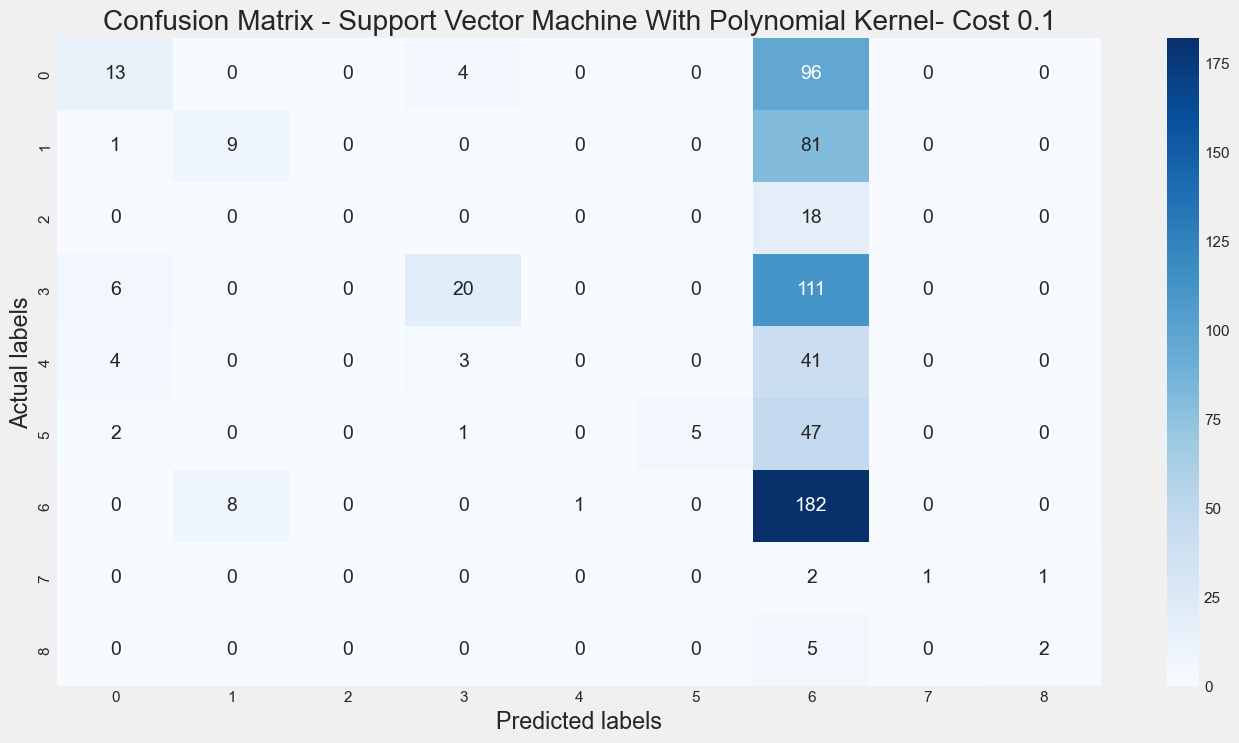

In [251]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_poly, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With Polynomial Kernel- Cost 0.1")
plt.show()

#### SVM with Ploynomial Kernel & an updated cost value

In [252]:
svm_poly_1 = SVC(kernel= 'poly', C = 1)
svm_poly_1.fit(train_x_onehotCoding, train_y)
svm_poly_1_pred = svm_poly_1.predict(test_x_onehotCoding)

cm_svm_poly_1 = confusion_matrix(test_y, svm_poly_1_pred)

# Print the confusion matrix
print(cm_svm_poly_1)

accuracy_poly_1 = accuracy_score(test_y, svm_poly_1_pred)
print(accuracy_poly_1)

[[ 37   0   1   7   5   2  61   0   0]
 [  2  27   0   0   0   1  60   1   0]
 [  0   0   2   3   1   0  12   0   0]
 [  8   2   0  77   4   0  46   0   0]
 [  6   2   0   9   9   3  19   0   0]
 [  2   1   0   1   2  35  14   0   0]
 [  1  15   2   0   0   3 170   0   0]
 [  0   0   0   0   0   0   2   1   1]
 [  0   0   0   0   0   0   3   0   4]]
0.5451807228915663


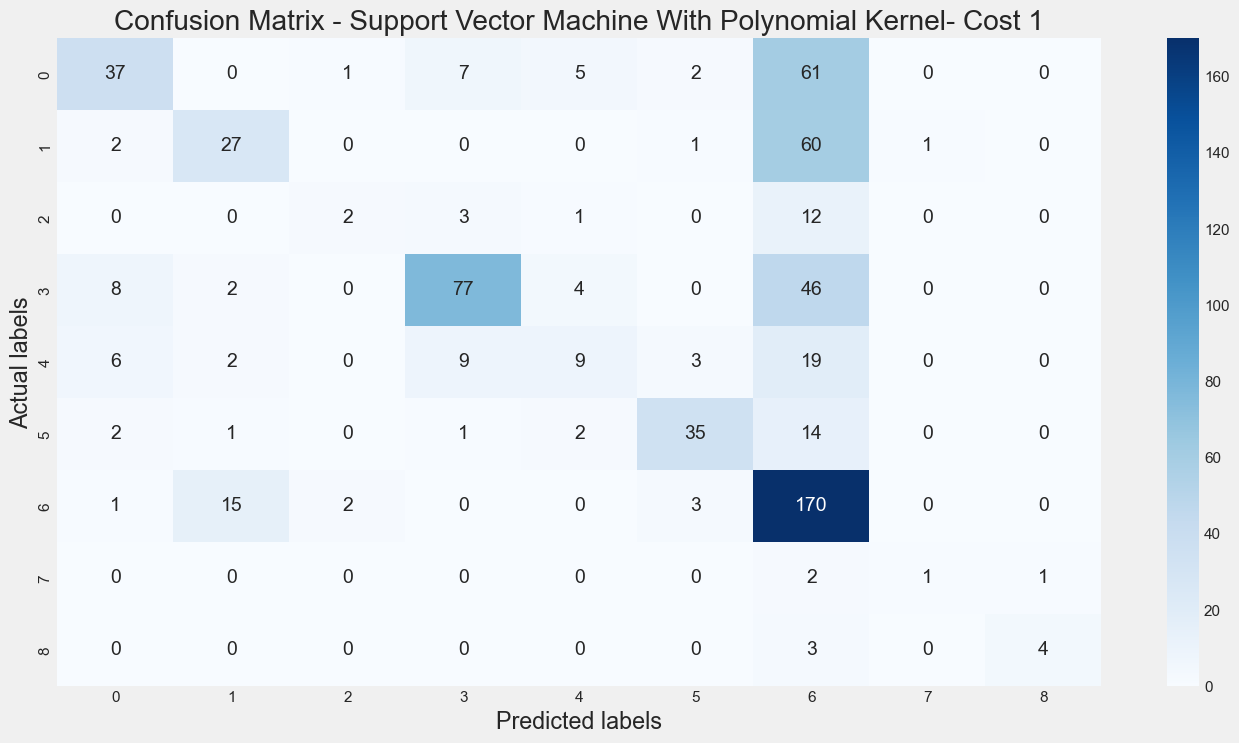

In [253]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_poly_1, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With Polynomial Kernel- Cost 1")
plt.show()

In [254]:
svm_poly_2 = SVC(kernel= 'poly', C = 10)
svm_poly_2.fit(train_x_onehotCoding, train_y)
svm_poly_2_pred = svm_poly_2.predict(test_x_onehotCoding)

cm_svm_poly_2 = confusion_matrix(test_y, svm_poly_2_pred)

# Print the confusion matrix
print(cm_svm_poly_2)

accuracy_poly_2 = accuracy_score(test_y, svm_poly_2_pred)
print(accuracy_poly_2)

[[ 47   0   2   5   8   1  50   0   0]
 [  3  33   0   0   2   1  51   1   0]
 [  0   0   4   2   2   0  10   0   0]
 [ 14   0   4  73   7   1  38   0   0]
 [ 14   4   0   4  18   2   6   0   0]
 [  2   1   1   2   2  40   7   0   0]
 [  1  18   3   0   7   3 158   0   1]
 [  0   0   0   0   0   0   1   1   2]
 [  0   0   0   0   0   0   2   0   5]]
0.5707831325301205


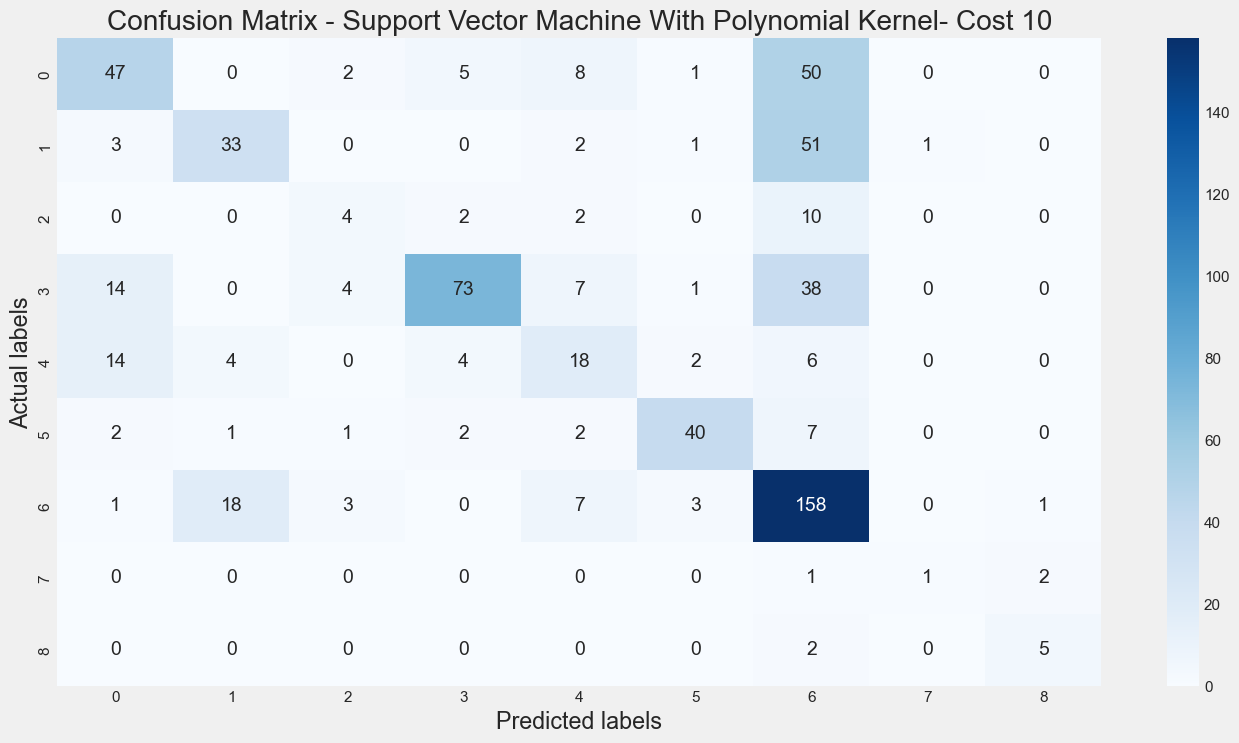

In [255]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_poly_2, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With Polynomial Kernel- Cost 10")
plt.show()

#### Linear Kernel

In [256]:
svm_linear = SVC(kernel= 'linear', C = 0.1)
svm_linear.fit(train_x_onehotCoding, train_y)
svm_linear_pred = svm_linear.predict(test_x_onehotCoding)

cm_svm_linear = confusion_matrix(test_y, svm_linear_pred)

# Print the confusion matrix
print(cm_svm_linear)

accuracy_linear = accuracy_score(test_y, svm_linear_pred)
print(accuracy_linear)

[[ 74   0   1  20   7   4   7   0   0]
 [  6  46   0   0   0   1  38   0   0]
 [  1   0   3   2   2   0  10   0   0]
 [ 18   0   3 104   4   2   6   0   0]
 [ 15   3   0   7  12   2   9   0   0]
 [  7   2   1   1   2  38   4   0   0]
 [  5  22   2   0   4   4 154   0   0]
 [  0   0   0   0   0   0   1   1   2]
 [  0   0   0   1   0   0   1   0   5]]
0.6581325301204819


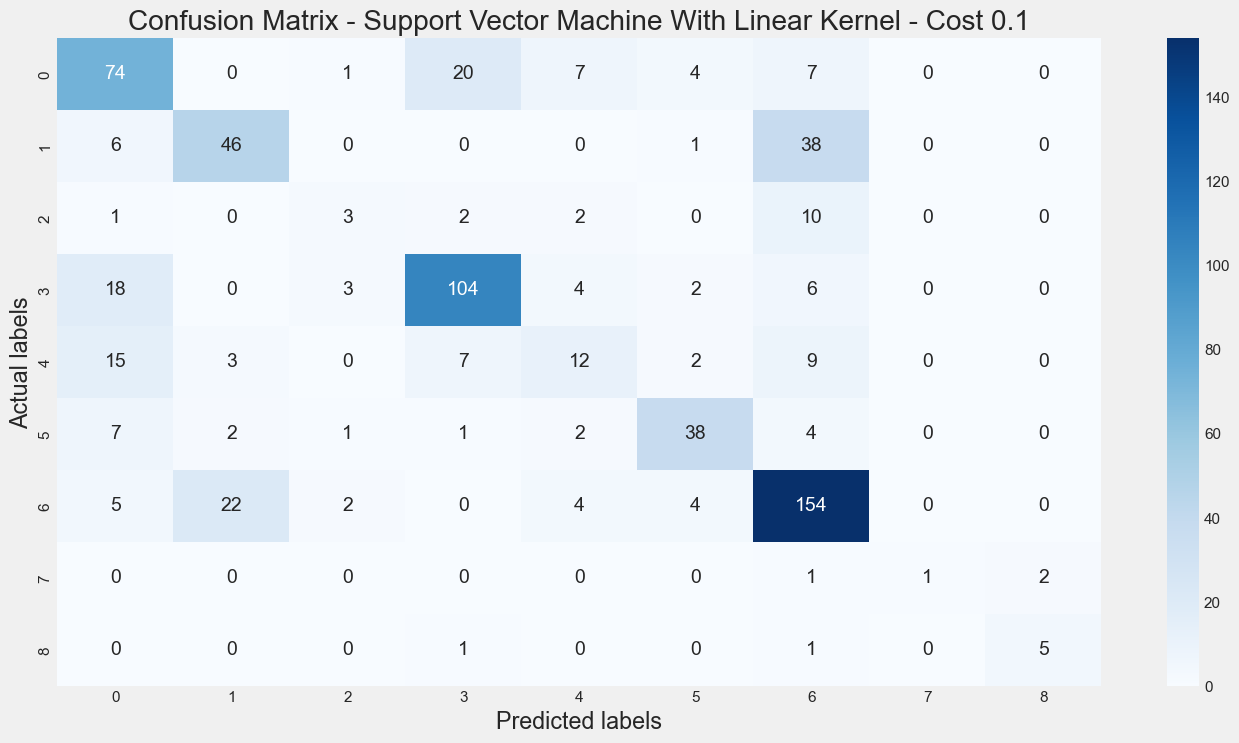

In [257]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_linear, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With Linear Kernel - Cost 0.1")
plt.show()

In [258]:
svm_linear_1 = SVC(kernel= 'linear', C = 1)
svm_linear_1.fit(train_x_onehotCoding, train_y)
svm_linear_pred_1 = svm_linear_1.predict(test_x_onehotCoding)

cm_svm_linear_1 = confusion_matrix(test_y, svm_linear_pred_1)

# Print the confusion matrix
print(cm_svm_linear_1)

accuracy_linear_1 = accuracy_score(test_y, svm_linear_pred_1)
print(accuracy_linear_1)

[[ 73   0   1  26   8   2   3   0   0]
 [  4  46   0   1   2   1  36   1   0]
 [  0   0   3   3   2   0  10   0   0]
 [ 16   1   3 107   3   2   5   0   0]
 [ 15   3   0   6  17   2   5   0   0]
 [  3   3   1   3   4  38   3   0   0]
 [  1  21   1   2   7   5 153   0   1]
 [  0   0   0   0   0   0   0   1   3]
 [  0   0   0   0   0   0   1   0   6]]
0.6686746987951807


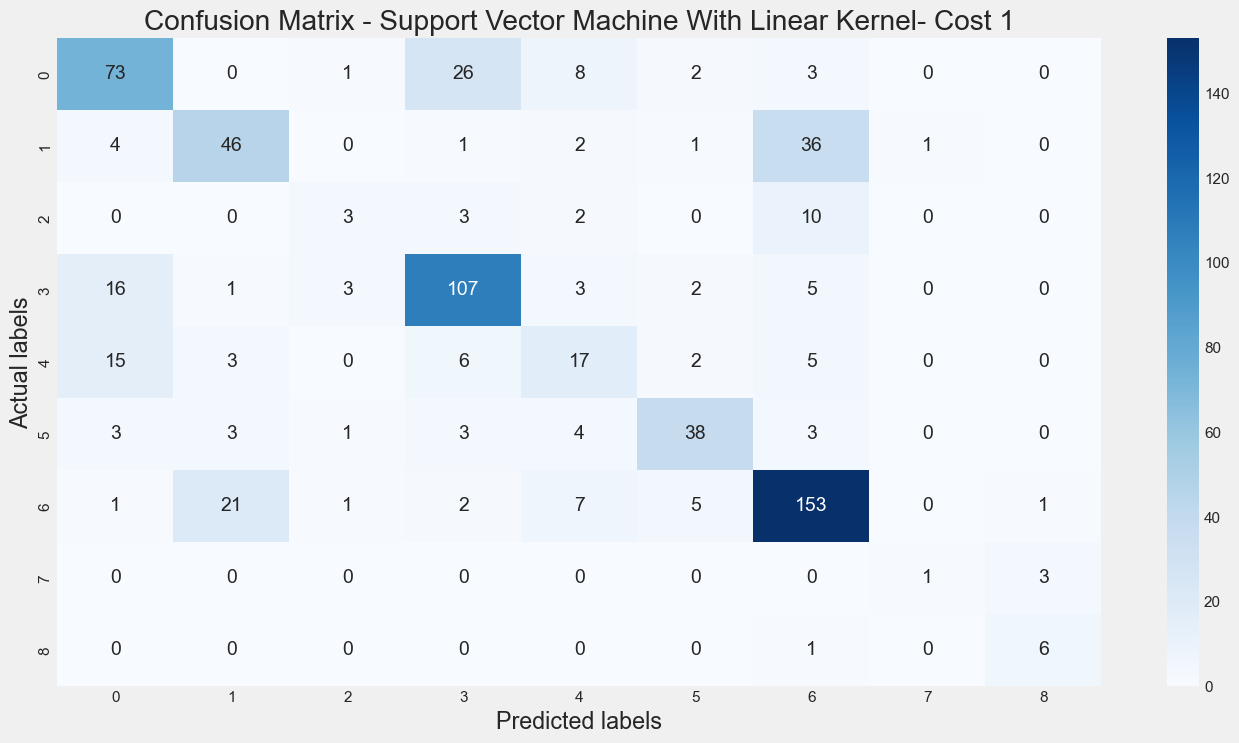

In [259]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_linear_1, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With Linear Kernel- Cost 1")
plt.show()

In [260]:
svm_linear_2 = SVC(kernel= 'linear', C = 10)
svm_linear_2.fit(train_x_onehotCoding, train_y)
svm_linear_pred_2 = svm_linear_2.predict(test_x_onehotCoding)

cm_svm_linear_2 = confusion_matrix(test_y, svm_linear_pred_2)

# Print the confusion matrix
print(cm_svm_linear_2)

accuracy_linear_2 = accuracy_score(test_y, svm_linear_pred_2)
print(accuracy_linear_2)

[[ 73   0   2  25   8   2   3   0   0]
 [  4  46   0   1   2   1  36   1   0]
 [  0   0   3   3   2   0  10   0   0]
 [ 14   1   4 107   3   2   6   0   0]
 [ 15   3   0   6  17   2   5   0   0]
 [  3   3   1   3   4  38   3   0   0]
 [  1  20   1   2   6   6 154   0   1]
 [  0   0   0   0   0   0   0   1   3]
 [  0   0   0   0   0   0   1   0   6]]
0.6701807228915663


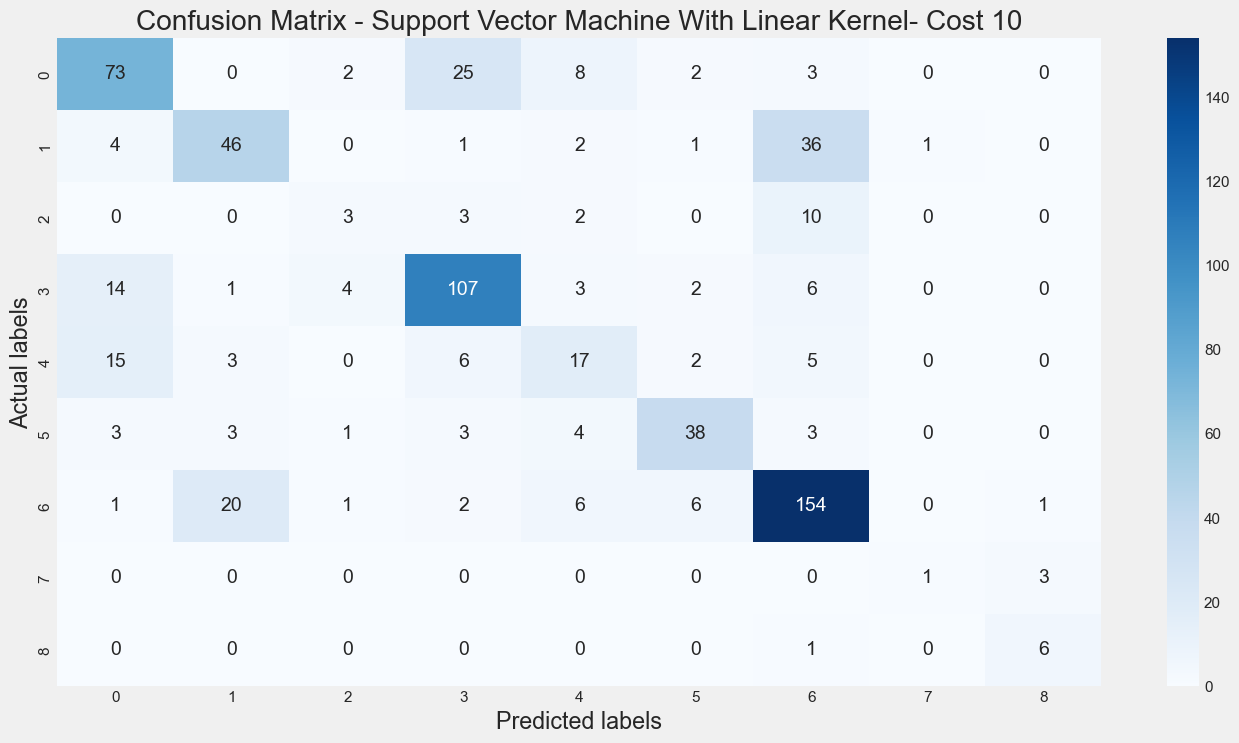

In [261]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm_linear_2, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix - Support Vector Machine With Linear Kernel- Cost 10")
plt.show()